# Subtask №3 | Test Task PA
##### _Pavlo Kukurik_

In [1]:
# Importing libs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import color_palette

In [2]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (30, 10)

### Reading Files

In [3]:
df = pd.read_csv('data/reading_data.csv')
df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53


In [4]:
summary_df = pd.read_csv('data/summary_info.csv')
summary_df

,topic,book_id
0,Health,012399fc36f74c489e4e
1,Health,01b85da7d21c478ab4b1
2,Health,0eef51fd8ce54d51bff6
3,Health,0efd511e57ea414ab5ab
4,Health,1251469de9ce40deace4
...,...,...
4340,Narrative Nonfiction,kf1lgMc5cwj6Oy4pY8qg
4341,Narrative Nonfiction,nfll6gVlKSMITW1bUCUH
4342,Narrative Nonfiction,rxFsAqLVPUcrZQi349P7
4343,Narrative Nonfiction,uF4C0V8faBoDaZvaKpar


### Short Data Overview

In [5]:
summary_df['topic'].value_counts()

topic
Self-Reflection       99
Daily Optimization    96
Entrepreneurship      95
Team Dynamics         93
Mindfulness           84
                      ..
Survival               8
Natural World          8
Decision-Making        8
Personal Stories       8
Intimacy               8
Name: count, Length: 166, dtype: int64

In [6]:
df['user_id'].value_counts()

user_id
###          1564
INVALID      1512
???          1506
null_id      1479
broken_id    1419
             ... 
UOKC0FOY        1
VYHS7GPC        1
1S30KW5O        1
7Q1ZRZPV        1
TU4EVXR7        1
Name: count, Length: 228319, dtype: int64

In [7]:
df.isna().sum()

Unnamed: 0                      0
user_id                         0
event_time                      0
country                         0
event_type                      0
event_properties_book_id        0
event_properties_format         0
user_properties_age         21359
dtype: int64

In [8]:
summary_df.isna().sum()

topic      0
book_id    0
dtype: int64

In [9]:
# df[df["event_properties_book_id"].str.match(r"^[a-zA-Z0-9]{20}$", na=False)]
df[~df["event_properties_book_id"].str.match(r"^[a-zA-Z0-9]{20}$", na=False)]

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
1837,1837,8ZZS3ZSS,2024-06-28 12:37:57,Germany,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,21
2344,2344,UJE53I3Y,2024-06-29 23:40:12,United Kingdom,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,59
10088,10088,9RZTJZ6T,2024-06-29 07:43:55,Australia,summary_start,9363ef58-bf72-4a32-b32c-39ff0540c3b8,audio,20
13499,13499,T3WJI567,2024-06-21 19:01:58,United States,summary_last_page,a254a694-2e66-4854-b8b6-85a735c95613,text,22
16309,16309,GHYKKHWN,2024-06-30 14:14:19,Chile,summary_start,8bb282f0-b6be-42e7-a741-c21cff2c9cbd,audio,error
...,...,...,...,...,...,...,...,...
512958,512958,Z1FEOYHY,2024-06-26 23:51:35,United States,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,33
517150,517150,L50FTHVJ,2024-06-29 17:23:48,South Africa,summary_last_page,8bb282f0-b6be-42e7-a741-c21cff2c9cbd,text,47
518930,518930,OO9G4ZS1,2024-06-27 13:26:33,United States,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,32
521291,521291,FVJ4MRIG,2024-06-26 22:04:31,Netherlands,summary_start,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,52


After 2024-06-15 07:57:05, atypical values such as `a254a694-2e66-4854-b8b6-85a735c95613' began to appear in the data in the` `event_properties_book_id` column, relative to the usual `WUOlTHMd11KUsvKSMhPx`. But upon closer inspection, it seems to be completely `“clean”` data

### Cleaning the data and unite the datasets


In [10]:
df = df[df["user_id"] != "INVALID"]
df= df[df["user_id"].str.match(r"^[A-Za-z0-9]+$", na=False)]

df['user_id'].value_counts()

user_id
O608SMH5    117
PHS975R4     98
Y58F6GCD     95
OU037AKN     90
KTREUFV8     87
           ... 
VYHS7GPC      1
1S30KW5O      1
7Q1ZRZPV      1
TU4EVXR7      1
VRYAROZ7      1
Name: count, Length: 228314, dtype: int64

In [11]:
df.loc[:, "user_properties_age"] = pd.to_numeric(df["user_properties_age"], errors='coerce')
df = df[df["user_properties_age"].notna()]

df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0


In [12]:
users_with_multiple_books = (
    df.groupby(["user_id", "event_time"])["event_properties_book_id"]
    .nunique()
    .reset_index()
)

users_with_multiple_books = users_with_multiple_books[users_with_multiple_books["event_properties_book_id"] > 1]
multiple_books_df = df.merge(users_with_multiple_books[["user_id", "event_time"]], on=["user_id", "event_time"])

multiple_books_df


,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,56251,J90L49VK,2024-04-10 13:32:48,Mexico,summary_start,EuZmFy0nkKg5FWvJce6H,audio,43.0
1,168960,J90L49VK,2024-04-10 13:32:48,Mexico,summary_start,ce8e61e033b24511ac96,audio,39.0
2,127521,H5ZB6TOU,2024-06-09 13:59:27,Spain,summary_start,KaPrg9t8eFDTbdJtVKfe,audio,26.0
3,522403,H5ZB6TOU,2024-06-09 13:59:27,Spain,summary_start,d2301399914f48e68216,audio,21.0
4,253045,VV6D8D9I,2024-06-07 23:49:54,Philippines,summary_start,c51cf7bddd794b42808b,audio,38.0
5,386113,VV6D8D9I,2024-06-07 23:49:54,Philippines,summary_start,5a0967c6a1744c5594aa,audio,28.0
6,294145,3NTR18VI,2024-04-02 10:10:13,United States,summary_start,b8a55d8d3aa04da8975b,audio,64.0
7,308233,3NTR18VI,2024-04-02 10:10:13,United States,summary_start,8764d9eaeee2432d8df8,audio,61.0
8,309979,KJYCCYNA,2024-05-14 14:29:48,Ecuador,summary_start,479fe70467db49bd9192,audio,23.0
9,426481,KJYCCYNA,2024-05-14 14:29:48,Ecuador,summary_start,gN4R61QZBDlaUB4DcohA,audio,64.0


In [13]:
# Drop sers who read different books at the same time
users_to_remove = users_with_multiple_books["user_id"].unique()
df = df[~df["user_id"].isin(users_to_remove)]

In [14]:
# Drop duplicates (when same user make several events at the same time: 155 cases)
df = df.drop_duplicates(subset=["user_id", "event_time"], keep="first").copy()
df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0


Users who were reading summaries at the same time were removed from the dataset. In one case, these are just duplicates that can be explained by a technical failure, and in the other case, these are users who were reading different books at the same time. This can also be a technical failure in recording data, but it can also indicate that several people are using the same account. In this case, it is neither rational nor representative to consider such users in further analysis. In addition, it may be a sign that the user's account has been hacked or that the user has voluntarily shared their account. In both cases, this may be a reason to notify the user and block the account (in the first case to protect the user from fraudsters, in the second case to find out the details if, for example, such behavior contradicts the user's rules)

In [15]:
summary_df = summary_df.drop_duplicates(subset="book_id", keep="first").copy()

merged_df = df.merge(summary_df, left_on="event_properties_book_id", right_on="book_id", how="left")
merged_df["topic"] = merged_df["topic"].fillna("Unknown")
merged_df = merged_df.drop(columns=["book_id"])


merged_df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0,Education
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity
...,...,...,...,...,...,...,...,...,...
489616,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition
489617,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0,Daily Optimization
489618,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0,Mind Enhancement
489619,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0,Financial Management


In [16]:
unknown_books = merged_df[merged_df["topic"] == "Unknown"]
unknown_books['user_properties_age'].value_counts()

user_properties_age
63.0    1439
21.0    1429
33.0    1416
67.0    1407
48.0    1406
59.0    1402
64.0    1400
53.0    1397
38.0    1393
40.0    1393
24.0    1392
25.0    1390
34.0    1383
46.0    1382
26.0    1382
52.0    1380
42.0    1379
66.0    1379
36.0    1377
65.0    1372
54.0    1371
27.0    1371
49.0    1371
50.0    1369
51.0    1368
29.0    1368
18.0    1363
61.0    1363
47.0    1355
35.0    1353
41.0    1352
37.0    1349
20.0    1348
19.0    1347
22.0    1342
43.0    1340
23.0    1339
56.0    1338
45.0    1335
62.0    1333
55.0    1328
39.0    1328
60.0    1324
31.0    1324
44.0    1321
32.0    1321
30.0    1318
58.0    1318
57.0    1306
28.0    1296
Name: count, dtype: int64

### Functions

In [17]:
def age_distribution(df_name: pd.DataFrame, unique=False) -> plt.Figure():
    """
    This function plots the age distribution by users id.
    :param unique:
    :param df_name:
    :return:
    """

    if unique:
        sns.histplot(df_name.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color='crimson')
        plt.xlabel("Вік користувача")
        plt.ylabel("Кількість унікальних користувачів")
        plt.title("Розподіл віку унікальних користувачів")
        plt.show()

    else:
        sns.histplot(df_name["user_properties_age"],bins=50, color='crimson')
        plt.xlabel("Вік користувача")
        plt.ylabel("Кількість читачів")
        plt.title("Розподіл віку користувачів (Активнсть користувачів за віком)")
        plt.show()

In [18]:
def age_distribution_separately(df_1: pd.DataFrame, df_2: pd.DataFrame, df_3: pd.DataFrame, unique=False) -> plt.Figure():
    """
    This function plots the age distribution by users id
    :param df_1: DataFrame 1 with whole data
    :param df_2: DataFrame 2 with users who don`t change age
    :param df_3: DataFrame 3 with users who change age
    :param unique:
    :return:
    """
    if unique:
        sns.histplot(df_1.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="orange", label="Загалом")
        sns.histplot(df_2.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="crimson", label="Не змінили вік")
        sns.histplot(df_3.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="seagreen", label="Змінювали вік", alpha=1)
        plt.legend()
        plt.title('Розподіл користувачі за віком')
        plt.show()

    else:
        sns.histplot(df_1["user_properties_age"], bins=50, color="orange", label="Загалом")
        sns.histplot(df_3["user_properties_age"], bins=50, color="seagreen", label="Змінювали вік")
        sns.histplot(df_2["user_properties_age"], bins=50, color="crimson", label="Не змінили вік", alpha=1)
        plt.legend()
        plt.title('Активність користувачів за віком')
        plt.show()

In [19]:
def plot_event_distributions(df_name: pd.DataFrame) -> plt.Figure():

    type_event = df_name['event_type'].value_counts()
    event_format = df_name['event_properties_format'].value_counts()

    sns.set_palette("Reds")

    fig, axes = plt.subplots(1, 2, figsize=(25, 15))

    axes[0].pie(type_event, labels=type_event.index, autopct="%1.1f%%", startangle=180, colors=sns.color_palette("Reds", len(type_event)))
    axes[0].set_title("Distribution of Event Type")

    axes[1].pie(event_format, labels=event_format.index, autopct="%1.1f%%", startangle=180, colors=sns.color_palette("Reds", len(event_format)))
    axes[1].set_title("Distribution of Event Format")

    plt.tight_layout()
    plt.show()

In [20]:
def plot_country_activity(df_name: pd.DataFrame) -> plt.Figure():
    """
    The func visualise the distribution of counties by user
    :param df_name: The dataframe`s name
    :return: show the distribution of counties by user
    """
    top_countries = df_name["country"].value_counts().head(10)
    unique_users_per_country = df_name.groupby("country")["user_id"].nunique().nlargest(10)

    sns.set_palette("Reds")
    fig, axes = plt.subplots(1, 2, figsize=(25, 10))

    sns.barplot(x=top_countries.index, y=top_countries.values, ax=axes[0], palette="Reds")
    axes[0].set_title("Top 10 Active Countries by Total Events")
    axes[0].set_ylabel("Total Events")
    axes[0].set_xlabel("Country")
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=unique_users_per_country.index, y=unique_users_per_country.values, ax=axes[1], palette="Reds")
    axes[1].set_title("Top 10 Countries by Unique Users")
    axes[1].set_ylabel("Unique Users")
    axes[1].set_xlabel("Country")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [21]:
def analyze_book_completion(df_name: pd.DataFrame) -> plt.Figure():
    """
    Analyze book completion rates based on user activity.
    :param df_name: DataFrame containing user interactions with books.
    :return: Prints summary statistics and displays a visualization.
    """

    completion_rates = df_name.groupby(["user_id", "event_properties_book_id"])["event_type"].nunique()
    fully_tracked_books = completion_rates[completion_rates == 2].count()
    total_started_books = (df_name["event_type"] == "summary_start").sum()
    completion_rate = fully_tracked_books / total_started_books if total_started_books > 0 else 0

    started_books = set(zip(
        df_name.loc[df_name["event_type"] == "summary_start", "user_id"],
        df_name.loc[df_name["event_type"] == "summary_start", "event_properties_book_id"]
    ))

    last_page_only = df_name[
        (df_name["event_type"] == "summary_last_page") &
        (~df_name[["user_id", "event_properties_book_id"]].apply(tuple, axis=1).isin(started_books))
    ]

    last_page_users = df_name.loc[df_name["event_type"] == "summary_last_page", "user_id"].nunique()
    start_users = df_name.loc[df_name["event_type"] == "summary_start", "user_id"].nunique()
    last_page_without_start_users = last_page_users - start_users

    users_with_only_last_page = set(df_name.loc[df_name["event_type"] == "summary_last_page", "user_id"]) - \
                                set(df_name.loc[df_name["event_type"] == "summary_start", "user_id"])

    print(f"Unique user-book pairs: {completion_rates.shape[0]}")
    print(f"Books fully tracked (started and completed): {fully_tracked_books}")
    print(f"Total books started: {total_started_books}")
    print(f"Estimated completion rate: {completion_rate:.2%}")
    print(f"Records with 'summary_last_page' but no 'summary_start': {last_page_only.shape[0]}")
    print(f"Unique users with only 'summary_last_page': {len(users_with_only_last_page)}")

    plt.figure(figsize=(30, 10))
    df_name["event_time"] = pd.to_datetime(df_name["event_time"])
    df_name[df_name["event_type"] == "summary_start"]["event_time"].hist(bins=50, alpha=1, label="summary_start", color='orange')
    last_page_only["event_time"].hist(bins=50, alpha=1, label="summary_last_page only", color='crimson')
    plt.xlabel("Event Time")
    plt.ylabel("Count")
    plt.title("Distribution of 'summary_last_page' without 'summary_start'")
    plt.legend()
    plt.show()

In [22]:
def plot_user_activity(df_name: pd.DataFrame) -> None:
    """
    The function visualizes daily user activity with a rolling average.

    :param df_name: The DataFrame containing 'event_time' and 'daily_reads' columns.
    :return: None, displays the user activity plot.
    """
    df_name["rolling_avg"] = df_name["daily_reads"].rolling(window=7).mean()

    mean_reads = df_name["daily_reads"].mean()
    std_reads = df_name["daily_reads"].std()

    plt.figure(figsize=(30, 10))
    sns.scatterplot(x=df_name["event_time"], y=df_name["daily_reads"], alpha=0.5, color='royalblue', label="Daily Reads")
    sns.lineplot(x=df_name["event_time"], y=df_name["rolling_avg"], color="darkred", linewidth=3, label="7-Day Rolling Average")

    plt.axhline(mean_reads + 3 * std_reads, color="seagreen", linestyle="dashed", label="Anomaly Threshold (3σ)")
    plt.xlabel("Date")
    plt.ylabel("Number of Summaries Read per Day")
    plt.title("Daily User Activity with Rolling Average")
    plt.legend()
    plt.show()

In [23]:
def plot_time_diff_by_hour(df_name: pd.DataFrame) -> None:
    """
    The function visualizes the distribution of reading time differences by the hour of the day.

    :param df_name: The DataFrame containing 'event_time' and 'user_id' columns.
    :return: None, displays a boxplot of time differences.
    """
    df_copy = df_name.copy()
    df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
    df_copy["hour"] = df_copy["event_time"].dt.hour
    df_copy["time_diff"] = df_copy.groupby("user_id")["event_time"].diff().dt.total_seconds() / 3600

    plt.figure(figsize=(15, 8))
    sns.boxplot(x=df_copy["hour"], y=df_copy["time_diff"], color="crimson")
    plt.ylim(0, df_copy["time_diff"].quantile(0.95))
    plt.xlabel("Hour of the Day")
    plt.ylabel("Time Between Readings (Hours)")
    plt.title("Distribution of Time Between Readings by Hour")
    plt.show()

In [24]:
def plot_time_diff_distribution(df_name: pd.DataFrame) -> None:
    """
    The function visualizes the overall distribution of time differences between readings.

    :param df_name: The DataFrame containing 'event_time' and 'user_id' columns.
    :return: None, displays a histogram of time differences.
    """
    df_copy_ = df_name.copy()
    df_copy_["event_time"] = pd.to_datetime(df_copy_["event_time"], errors="coerce")
    df_copy_["time_diff"] = df_copy_.groupby("user_id")["event_time"].diff().dt.total_seconds() / 3600
    df_copy_ = df_copy_[df_copy_["time_diff"] > 0]

    plt.figure(figsize=(40, 15))
    sns.histplot(df_copy_["time_diff"], kde=True, color="crimson")
    plt.xlabel("Time Between Readings (Hours)")
    plt.ylabel("Number of Occurrences")
    plt.title("Distribution of Time Between Readings")
    plt.show()


In [25]:
def prepare_user_reading_data(df_name: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    The function processes event data to calculate time differences between readings
    and daily reading activity per user.
    :param df_name: The DataFrame containing 'user_id', 'event_time', and 'event_properties_book_id'.
    :return: A tuple containing:
        - df_copy: The processed DataFrame with 'time_diff' calculated.
        - user_daily_reads: A DataFrame with daily reading counts and outlier detection.
    """
    df_copy = df_name.copy()
    df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
    df_copy = df_copy.sort_values(by=["user_id", "event_time"])
    df_copy["prev_event_time"] = df_copy.groupby("user_id")["event_time"].shift(1)
    df_copy["time_diff"] = (df_copy["event_time"] - df_copy["prev_event_time"]).dt.total_seconds() / 3600

    user_daily_reads = df_copy.groupby(["user_id", df_copy["event_time"].dt.date])["event_properties_book_id"].count().reset_index()
    user_daily_reads.rename(columns={"event_properties_book_id": "daily_reads"}, inplace=True)

    mean_reads = user_daily_reads["daily_reads"].mean()
    std_reads = user_daily_reads["daily_reads"].std()
    user_daily_reads["z_score"] = (user_daily_reads["daily_reads"] - mean_reads) / std_reads

    return df_copy, user_daily_reads

In [26]:
def event_per_week(df_name: pd.DataFrame) -> plt.Figure():
    df_name["event_time"] = pd.to_datetime(df_name["event_time"])
    event_counts_weekly = df_name["event_time"].dt.to_period("W").value_counts().sort_index()

    plt.figure(figsize=(30, 10))
    plt.plot(event_counts_weekly.index.astype(str), event_counts_weekly.values, marker="o", linestyle="-",
             color="crimson")
    plt.xlabel("Week")
    plt.ylabel("Number of Events")
    plt.title("Event Distribution Per Week")
    plt.xticks(rotation=45)
    plt.show()

In [27]:
def plot_event_distribution_by_hour(df_name: pd.DataFrame) -> None:
    """
    The function visualizes the distribution of events by the hour of the day.

    :param df_name: The DataFrame containing an 'event_time' column.
    :return: None (displays the plot).
    """
    df_name["event_time"] = pd.to_datetime(df_name["event_time"], errors="coerce")
    event_counts_hourly = df_name["event_time"].dt.hour.value_counts().sort_index()

    plt.figure(figsize=(30, 10))
    plt.plot(event_counts_hourly.index, event_counts_hourly.values, marker="o", linestyle="-", color="crimson")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Events")
    plt.title("Event Distribution by Hour")
    plt.xticks(range(24))
    plt.show()

In [28]:
def hour_activity_by_country(df_name: pd.DataFrame, top_n: int = 5) -> None:
    """
    Visualizes the distribution of events by the hour of the day for the top N countries.
    :param df_name: name of dataset
    :param top_n: The number of top countries to include in the visualization (default is 5).
    :return: None (displays the plot).
    """
    df_copi = df_name.copy()
    df_copi["event_time"] = pd.to_datetime(df_copi["event_time"], errors="coerce")
    df_copi["hour"] = df_copi["event_time"].dt.hour

    top_countries = df_copi["country"].value_counts().head(top_n).index

    plt.figure(figsize=(30, 10))
    palette = sns.color_palette("husl", n_colors=len(top_countries))

    for i, country in enumerate(top_countries):
        country_data = df_copi[df_copi["country"] == country]
        sns.kdeplot(country_data["hour"], label=country, color=palette[i], linewidth=2)

    plt.xlabel("Hour of the Day", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title(f"Event Distribution by Hour for Top {top_n} Countries", fontsize=14)
    plt.xticks(range(24))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Country", fontsize=10)
    plt.show()

### EDA

In [29]:
df_cleaned = merged_df.copy()
df_cleaned

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0,Education
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity
...,...,...,...,...,...,...,...,...,...
489616,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition
489617,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0,Daily Optimization
489618,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0,Mind Enhancement
489619,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0,Financial Management


In [30]:
print(f"The number of unique users is: {df_cleaned['user_id'].nunique()}. This is the {df_cleaned['user_id'].nunique() / df_cleaned.__len__():.3}% of the data set.")
print('--------------------------------------------------------------------------')
print(f"The number of unique books is: {df_cleaned['event_properties_book_id'].nunique()}")


The number of unique users is: 221650. This is the 0.453% of the data set.
--------------------------------------------------------------------------
The number of unique books is: 1652


In [31]:
user_event_counts = df_cleaned.groupby("user_id")["event_time"].nunique()
single_event_users = user_event_counts[user_event_counts == 1]
total_users = len(user_event_counts)
percentage = len(single_event_users) / total_users * 100

print(f"Number of users with only one unique event: {len(single_event_users)}")
print(f"Percent of such users: {percentage:.2f}% (Between unique users)")

Number of users with only one unique event: 127198
Percent of such users: 57.39% (Between unique users)


#### The plot twist (Spliting th data)

###### Activity of users by age and users age distribution

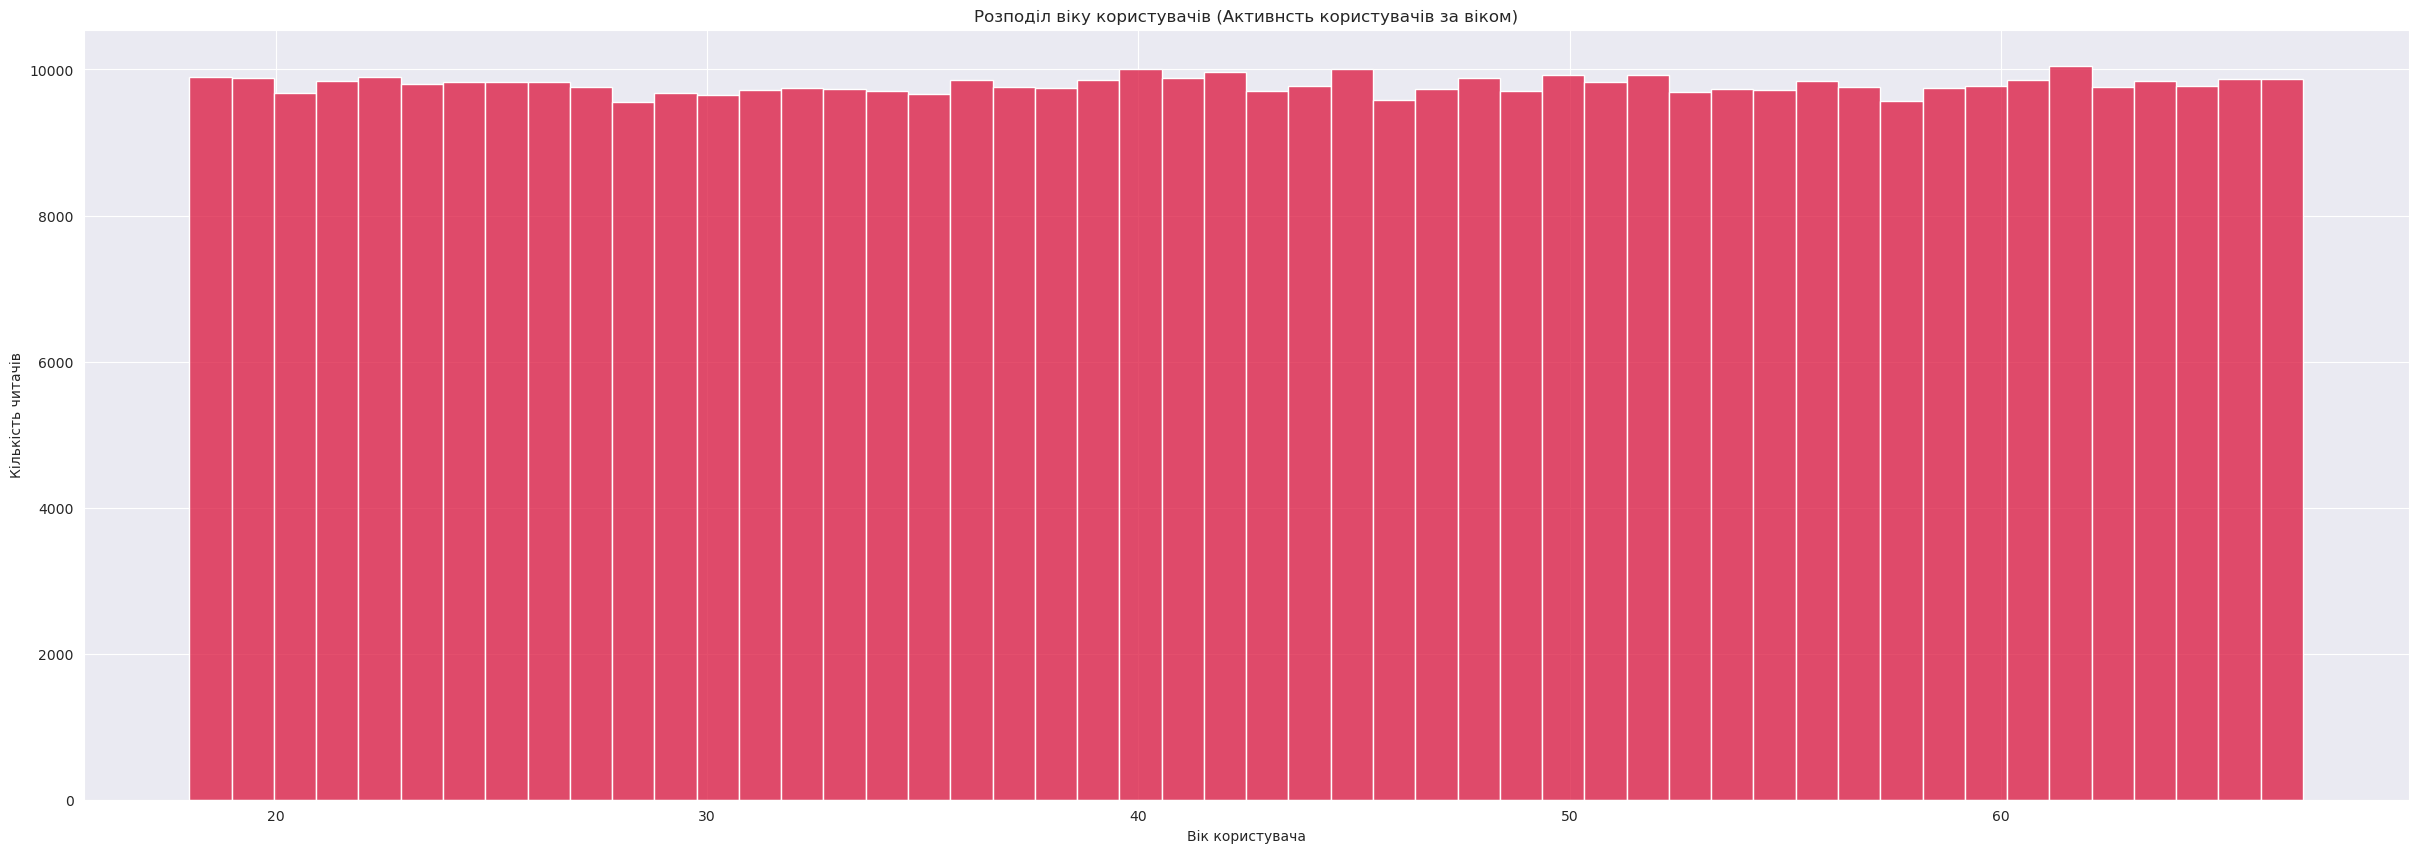

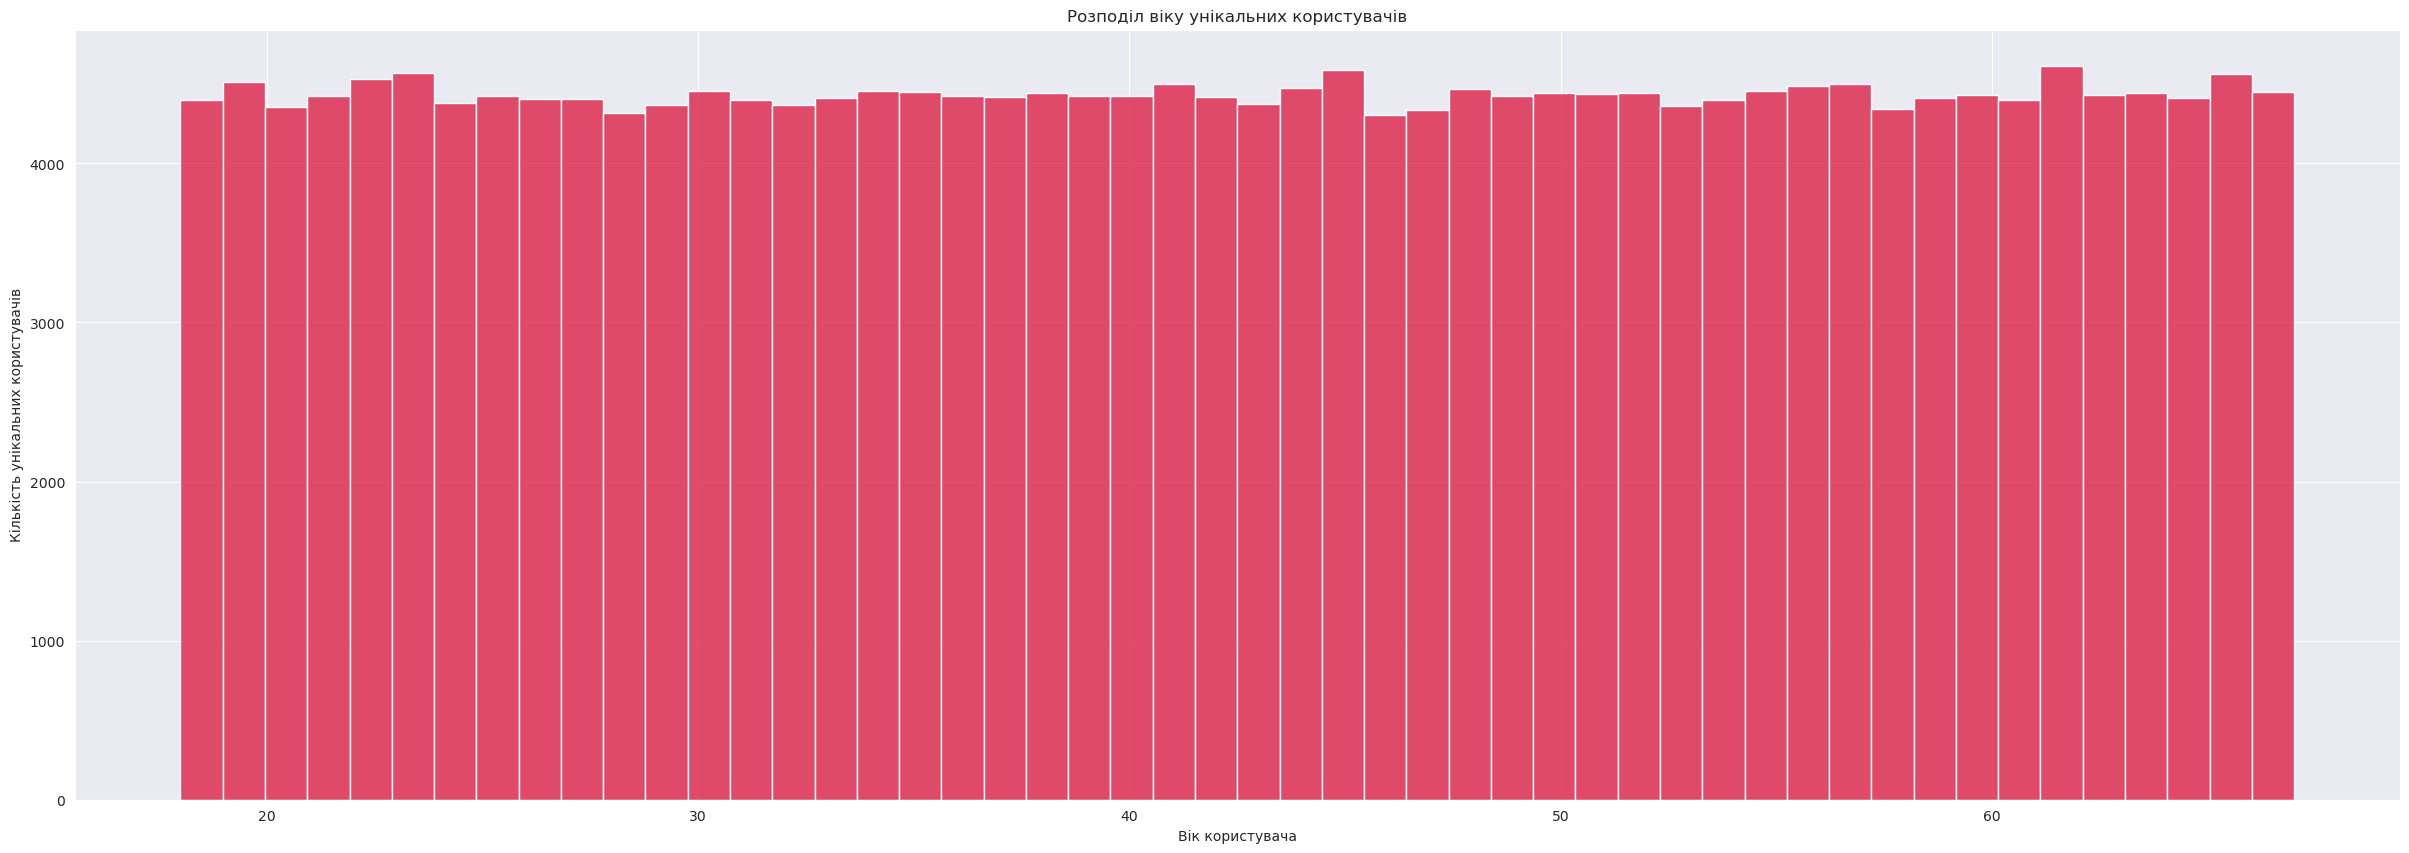

In [32]:
age_distribution(df_cleaned)
age_distribution(df_cleaned, unique=True)

Here we see that the  looks uniform, which is quite surprising. Also some users are changing their age during this time. Let`s look closer


In [33]:
df_copy = df_cleaned.copy()
df_copy["previous_age"] = df_copy.groupby("user_id")["user_properties_age"].shift(1)
users_with_age_changes = df_copy[df_copy["user_properties_age"] != df_copy["previous_age"]].dropna()
users_with_changes_ids = users_with_age_changes["user_id"].unique()
users_with_age_changes = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
users_without_age_changes = df_copy[~df_copy["user_id"].isin(users_with_changes_ids)]

# users_with_age_changes.drop_duplicates(subset="user_id")
users_with_age_changes

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic,previous_age
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown,NaN
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship,NaN
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science,NaN
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity,NaN
6,6,8Z5FY1Q5,2024-06-03 13:09:14,United States,summary_last_page,pADqpzgc48WYGTGYQLfn,audio,19.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...
489611,523131,KV7XABCL,2024-05-09 02:26:42,United States,summary_last_page,5de53a7711e54ad6881c,audio,23.0,Empowerment,38.0
489614,523136,K5SZLO4G,2024-05-13 11:35:55,United States,summary_start,f5a4fb9dfd3e420aaa21,audio,31.0,Mind Enhancement,56.0
489615,523137,AGFW7EES,2024-06-04 05:17:29,United States,summary_start,J6fy6QCxXDjJg74r8xmh,audio,50.0,Survival,37.0
489616,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition,49.0


In [34]:
df_cleaned[df_cleaned["user_id"].isin(users_with_changes_ids)].groupby("user_id")["user_properties_age"].agg(list).head(10)

user_id
000EASFZ    [31.0, 25.0, 28.0, 64.0, 54.0, 30.0, 58.0, 61....
000L9LNJ     [48.0, 19.0, 51.0, 53.0, 22.0, 39.0, 44.0, 63.0]
0015JC17                                   [64.0, 38.0, 67.0]
001FV4T5                 [24.0, 64.0, 21.0, 42.0, 52.0, 39.0]
001LXFJB    [45.0, 55.0, 28.0, 55.0, 52.0, 45.0, 24.0, 25....
001M897V                                   [49.0, 55.0, 61.0]
001RB3KN                             [54.0, 54.0, 66.0, 56.0]
002JQD3M                                         [42.0, 44.0]
0030EYEB                             [26.0, 34.0, 25.0, 51.0]
00473AO2                                         [23.0, 48.0]
Name: user_properties_age, dtype: object

Here we can see that some users change their age so randomly. There may be some problems during data recording or a technical failure
Let`s look how change age distributions in each subset

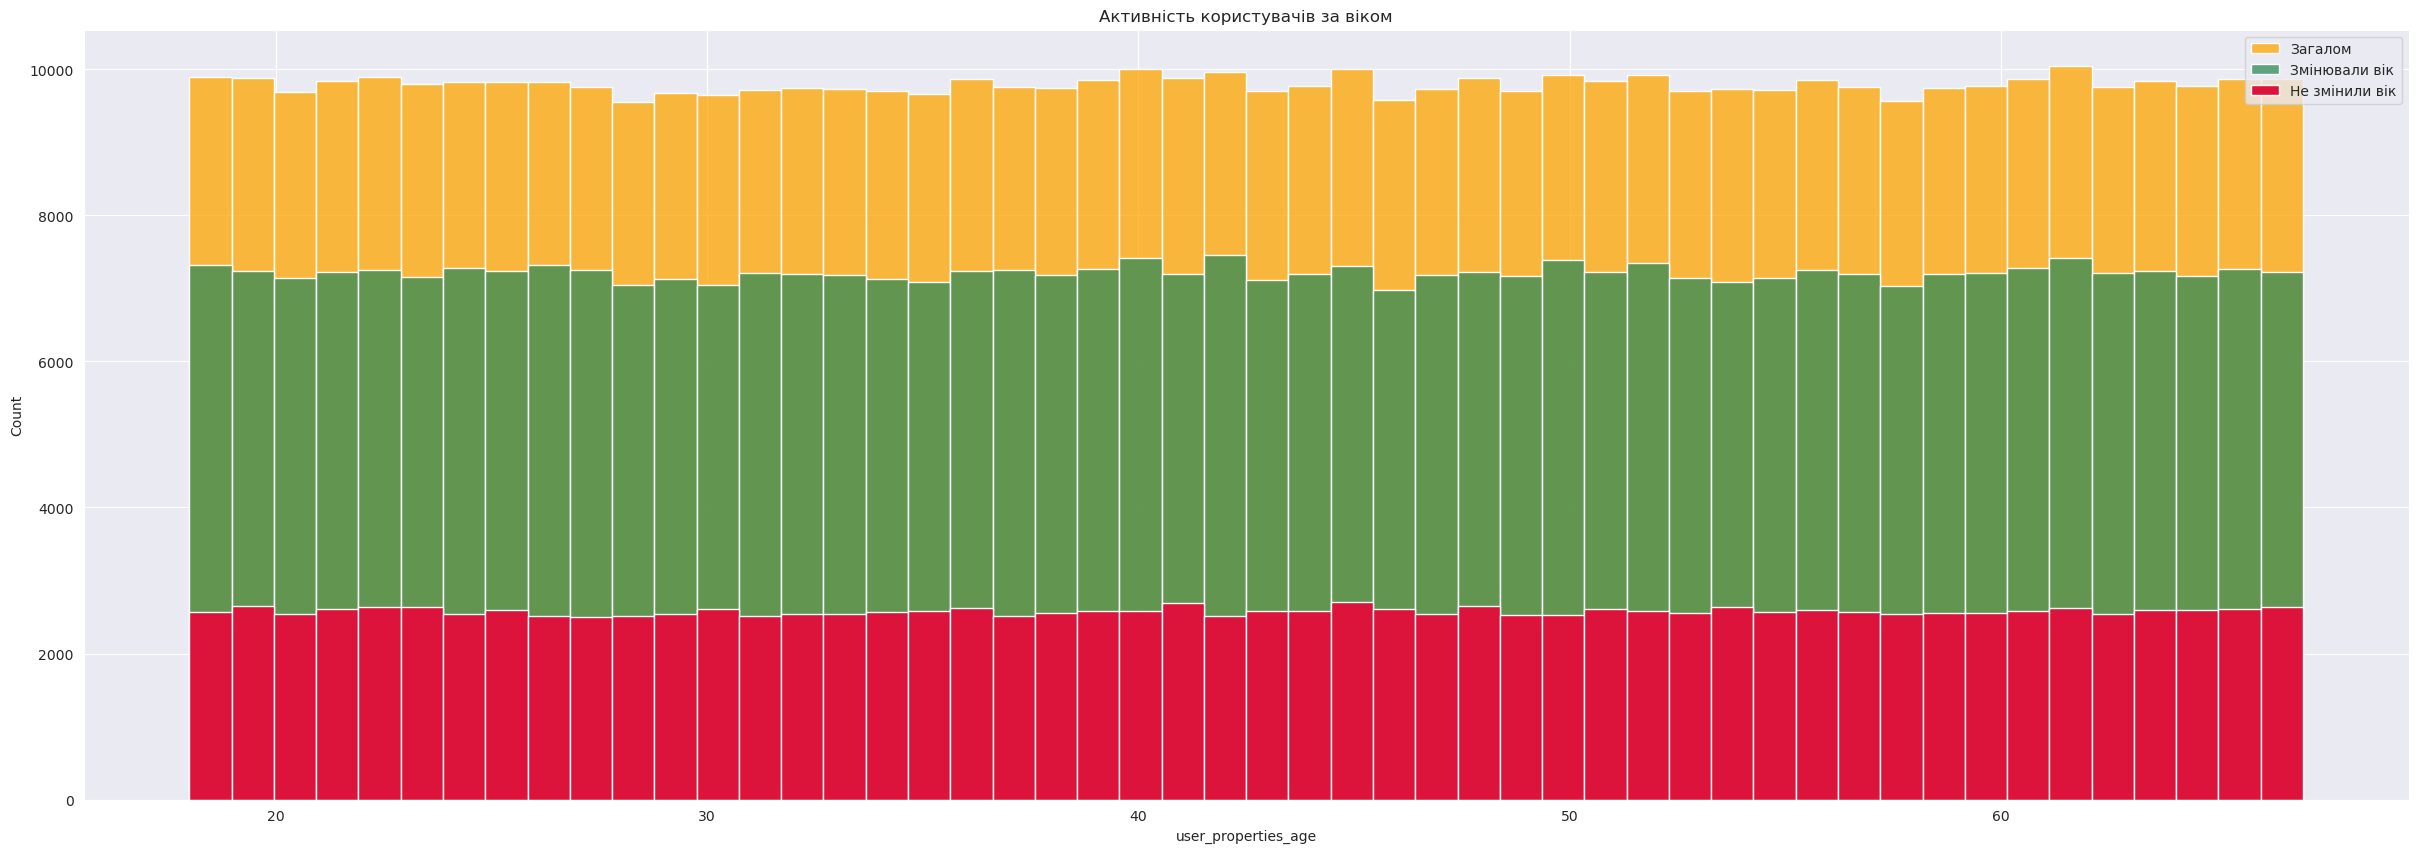

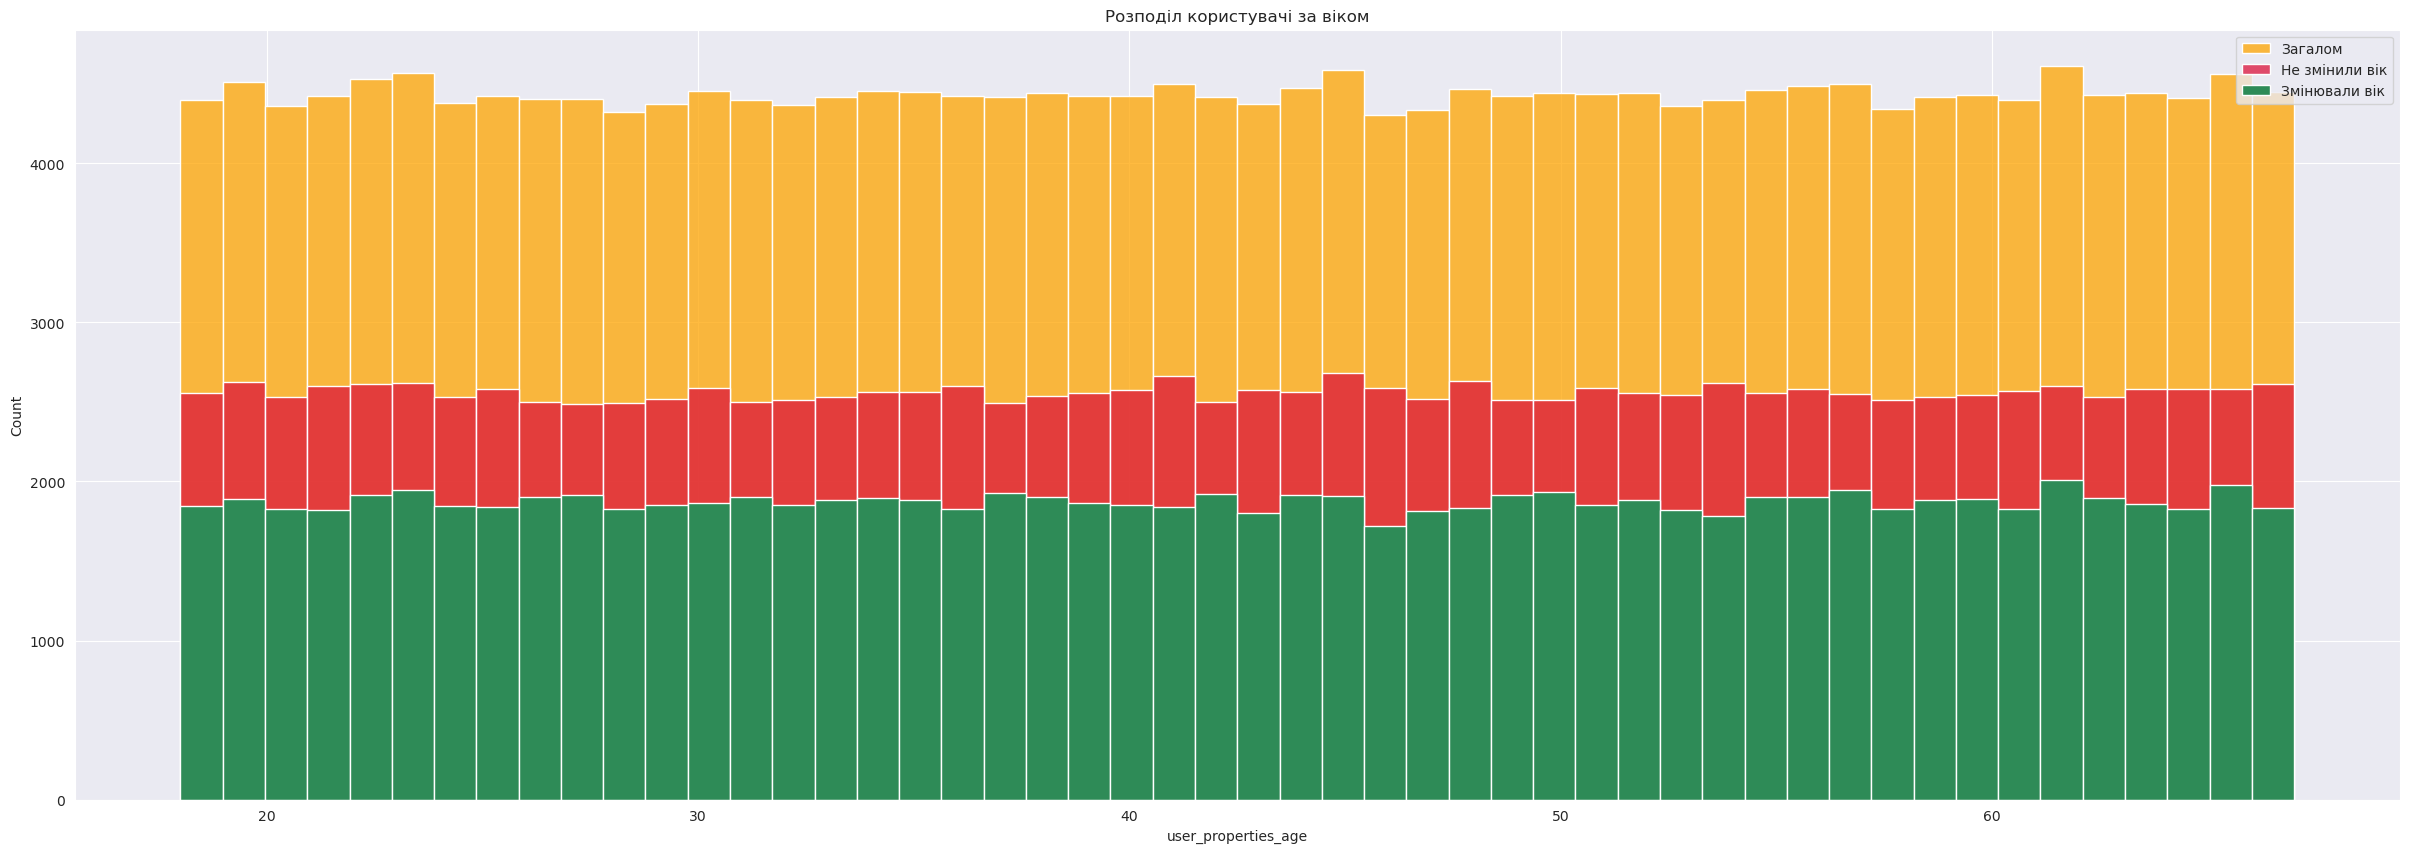

In [35]:
age_distribution_separately(df_cleaned, users_without_age_changes, users_with_age_changes)
age_distribution_separately(df_cleaned, users_without_age_changes, users_with_age_changes, unique=True)

As you can see from these graphs, the distribution remains uniform even if you exclude users who have changed their age. We can also see that although there are fewer users who change their age, they generate significantly more activity. It looks like the data was generated using a uniform distribution or it is a very strange technical glitch.

Such age-changing users could be considered a common error and removed for further study. But they make up the majority of the data and generate about 2/3 of the activity. Also, their removal almost does not change the main indicators of the distributions (more on this below). Therefore, at this stage, I decided to divide the data into: General, Changing age, Not changing age. I will work with them separately and study them according to a similar structure, because except for the age change, they are almost identical


#### General Data

##### Distributions

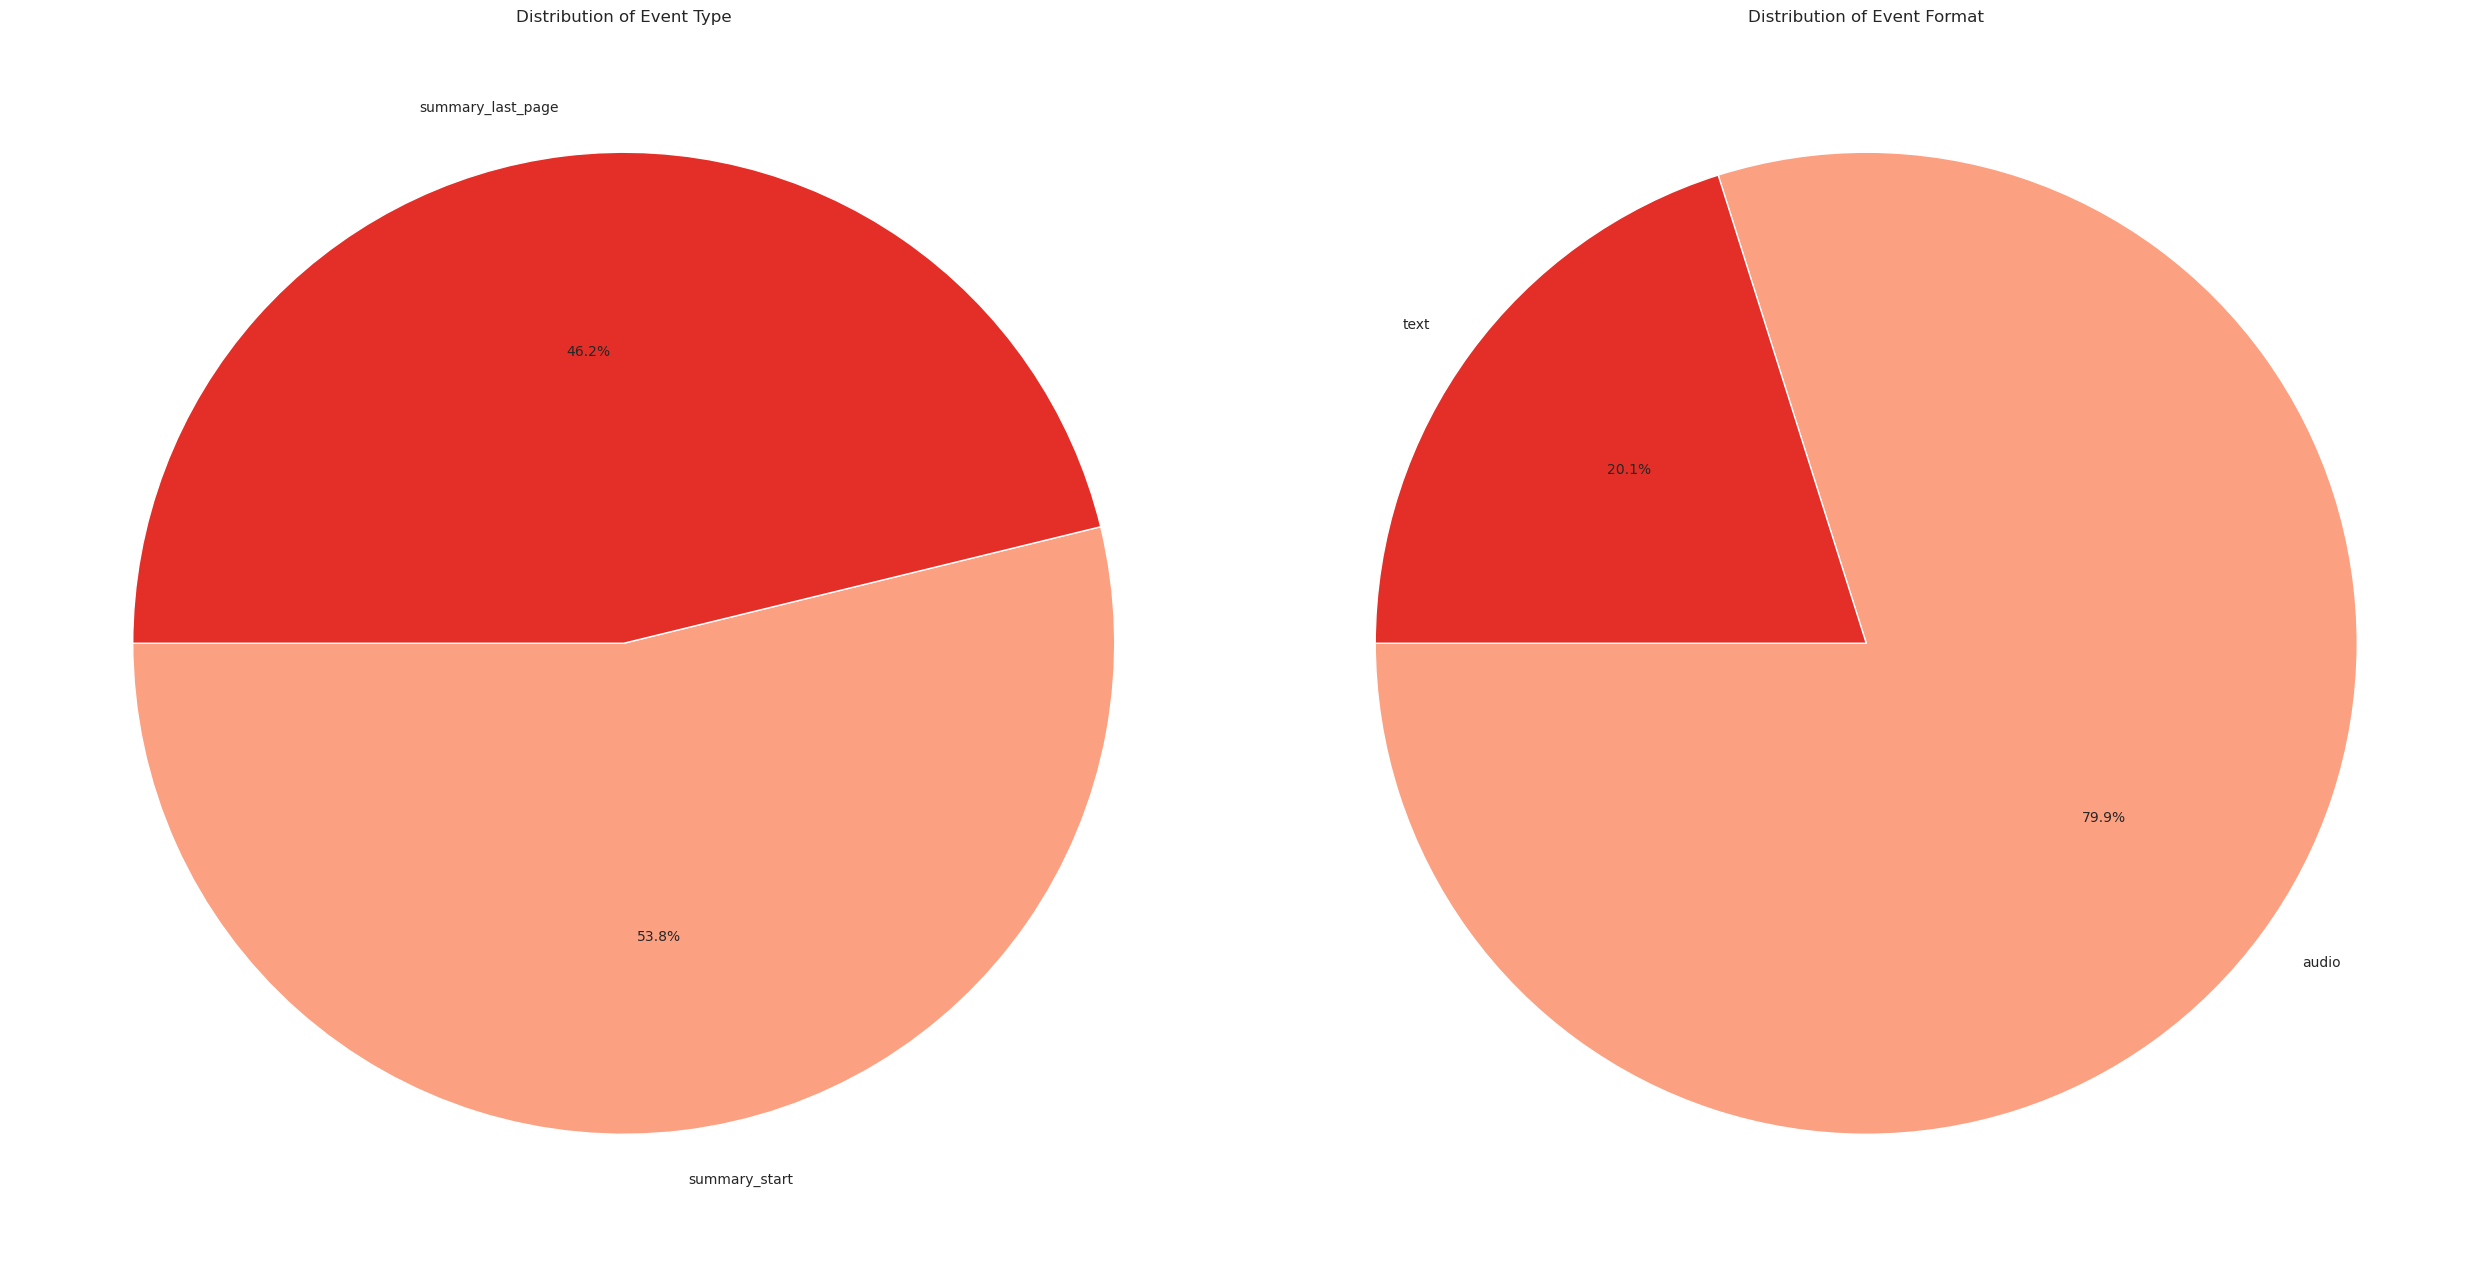

In [36]:
plot_event_distributions(df_cleaned)

As we can see from the second diagram, most users prefer the audio format. As for the first one, we can say that corseters almost always read summaries, but this is only at first glance, so it's worth looking into it in more detail

Unique user-book pairs: 470919
Books fully tracked (started and completed): 15009
Total books started: 263483
Estimated completion rate: 5.70%
Records with 'summary_last_page' but no 'summary_start': 210926
Unique users with only 'summary_last_page': 59768


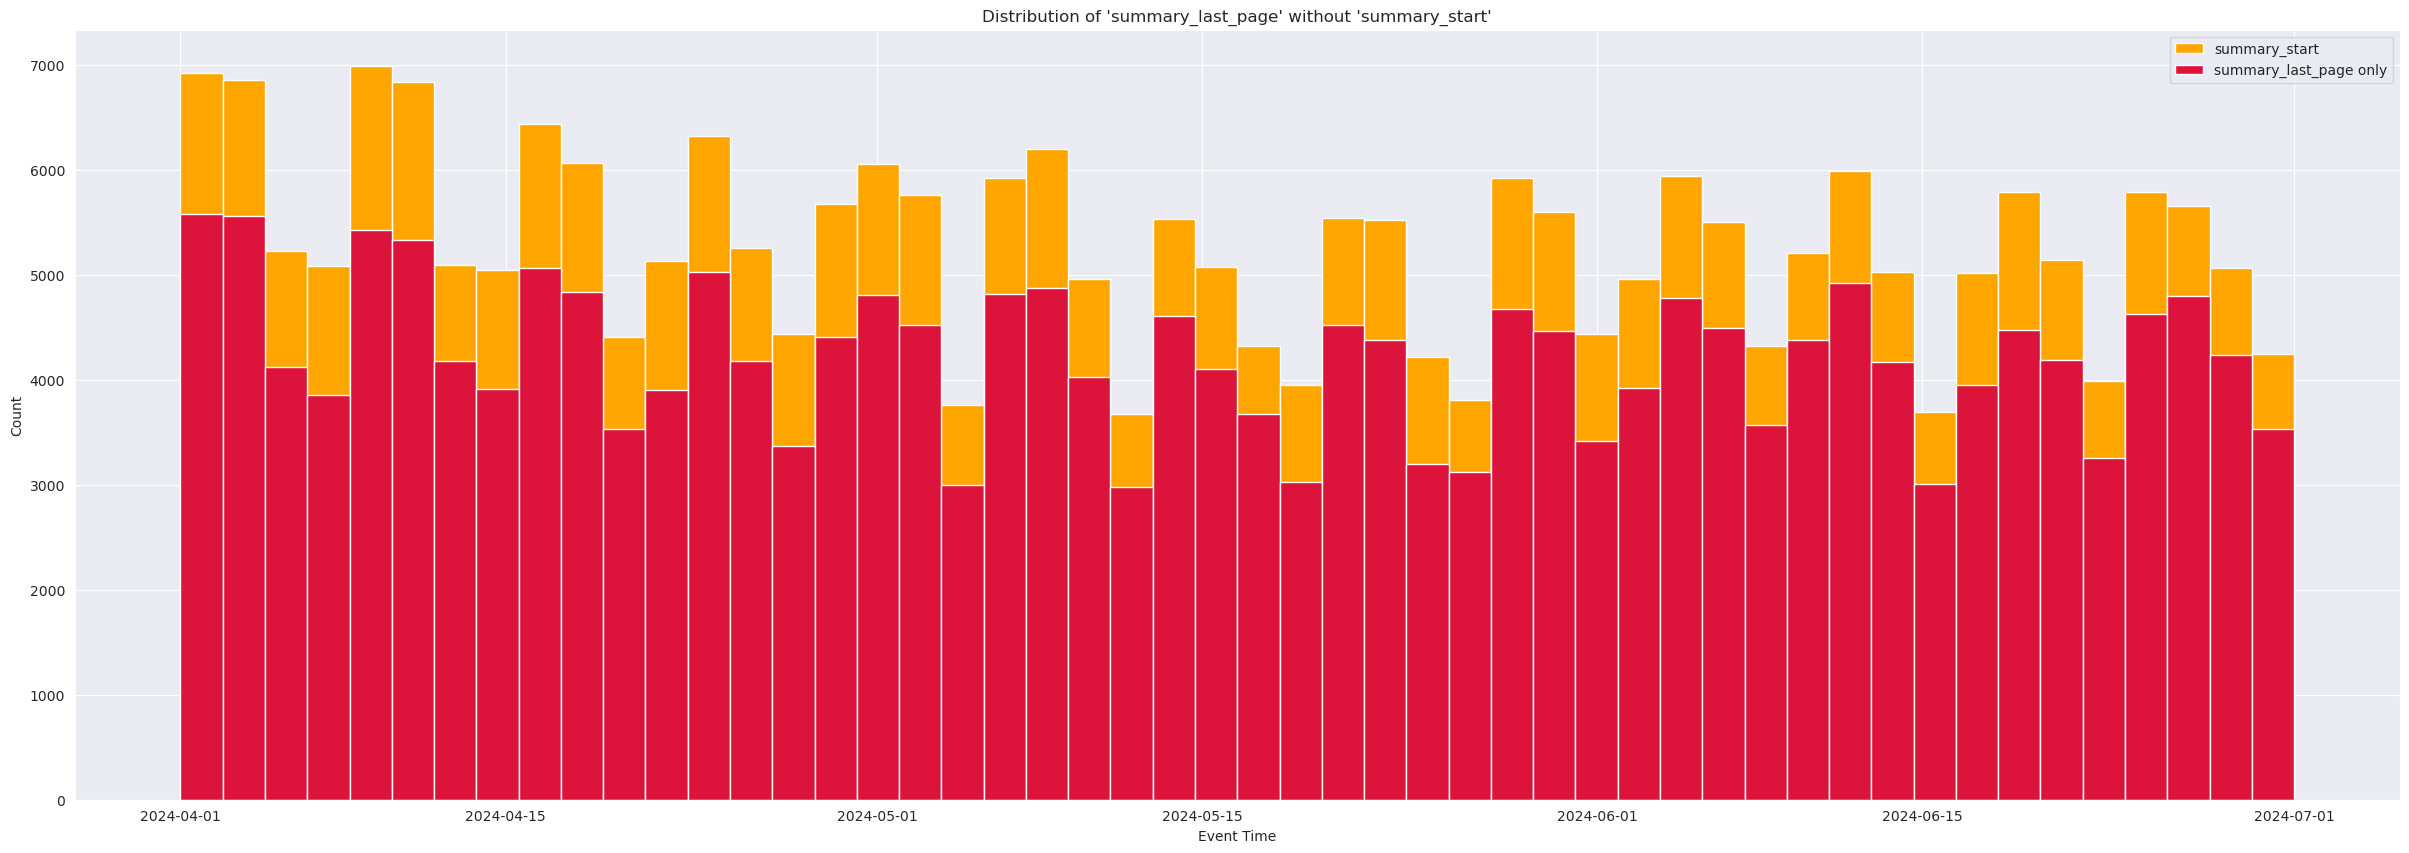

In [37]:
analyze_book_completion(df_cleaned)

As you can see from the diagram, a significant number of users view the last page of the samari without fixing the start of reading. Most likely, this means that the user started reading this summary before the recording of this data period began. It can also be a failure in data recording, so you should pay attention to this in the future, check the data recording process and check if this is the case based on data for a longer period of time (if any).

As for other indicators:

Records from `summary_last_page`: `210_000`. This is almost half of all records and it has been de-segmented by `59,768` users, which may indicate significant gaps from the beginning of reading to the end.
A total of `263,483 reads were started during this time, of which only `15,009 were completed, which is `5.70%`. This is a very low rate. However, based on the fact that almost half of the requests are “reads” from the previous preceding period, we can assume that users have long gaps between reading (more on this below) and will finish these books later.

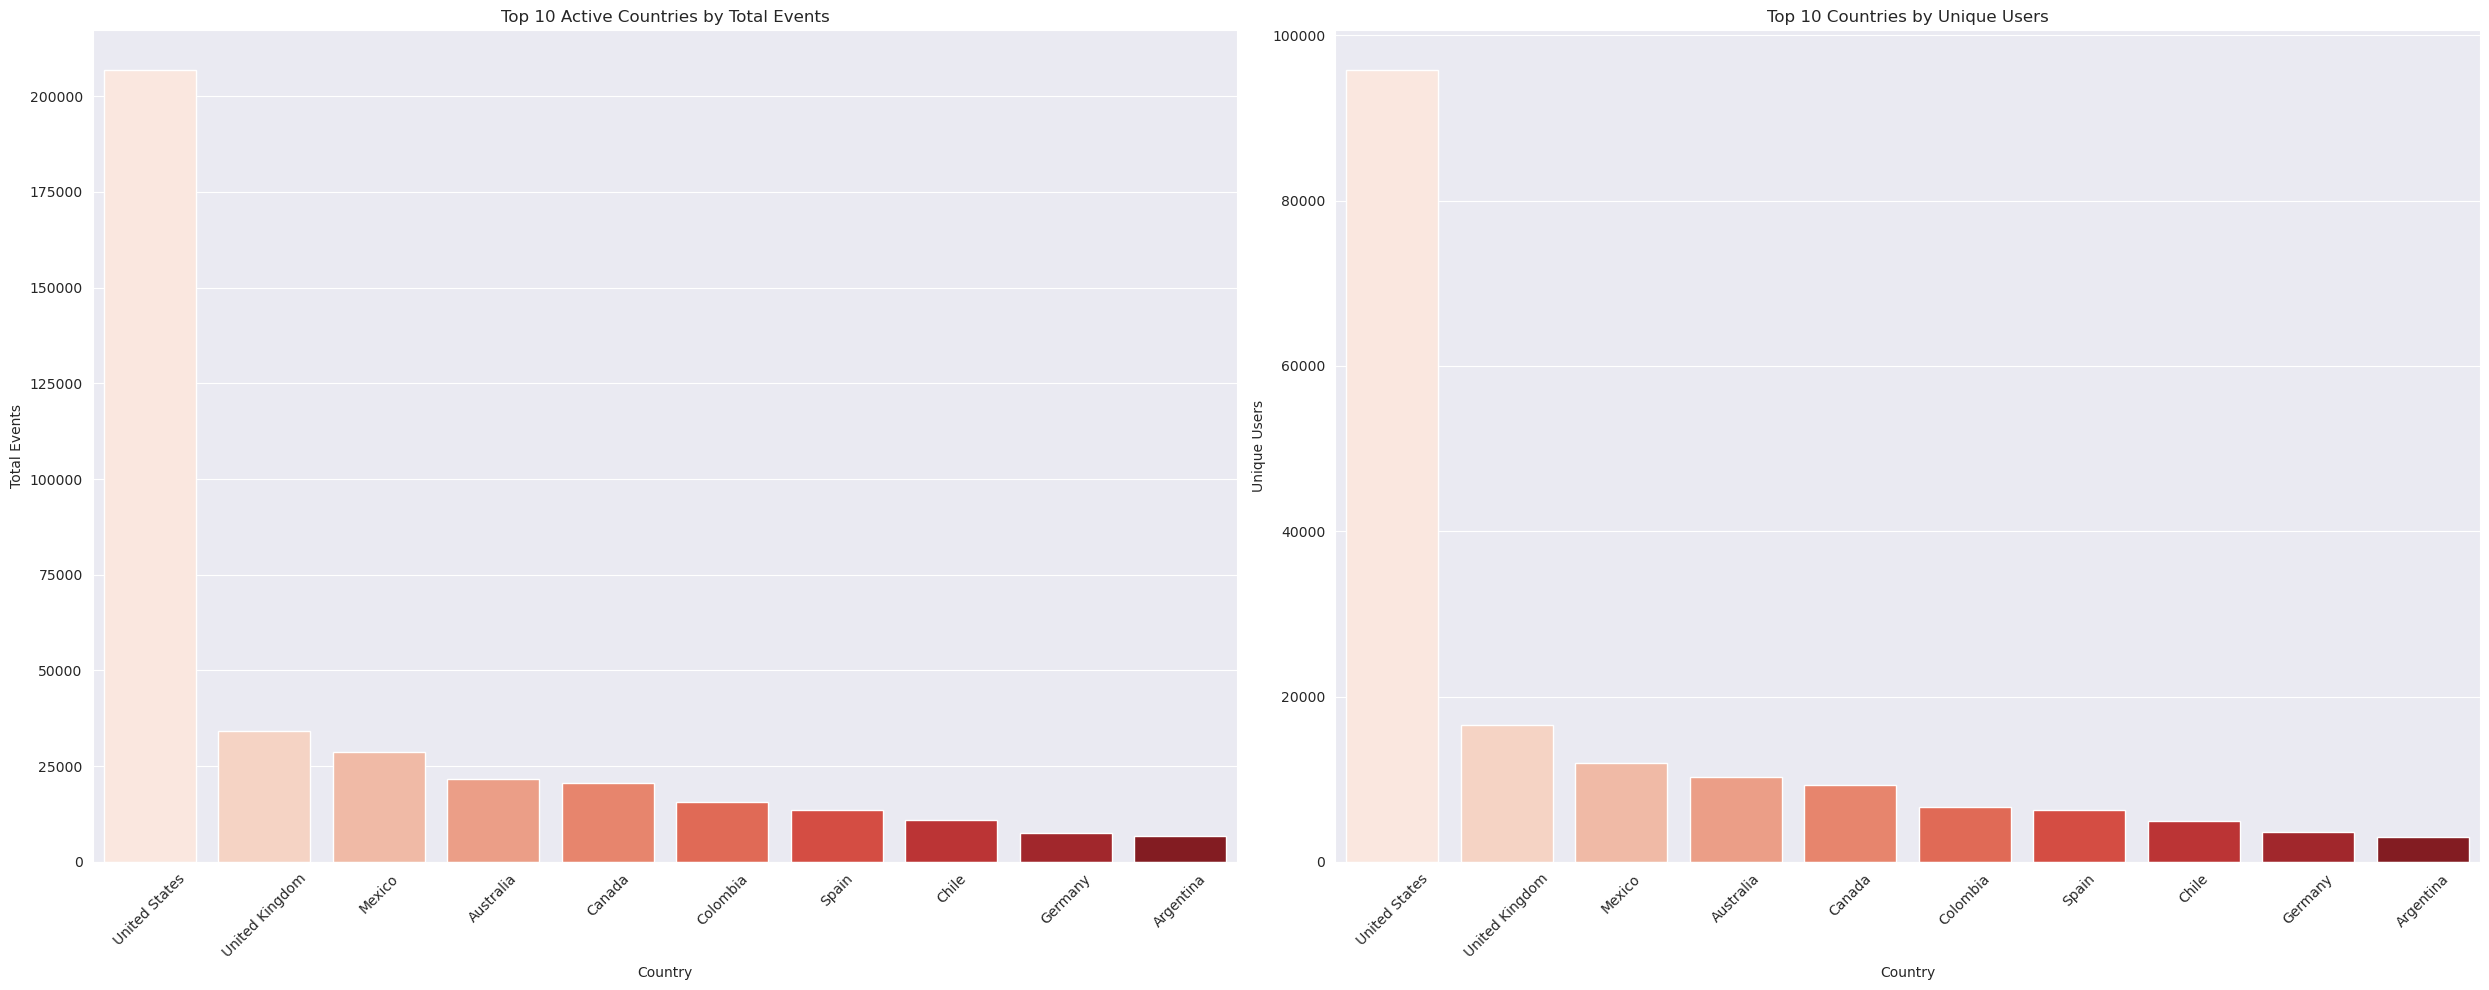

In [38]:
plot_country_activity(df_cleaned)

The United States has the dominant share among countries in terms of both activity and the number of users, and it is also interesting that the distribution of these indicators is very similar. We can also see that English and Spanish speakers dominate among the top 10 countries, and it is this audience (and these languages) that should be emphasized.

##### Time differences between reading summary

In [39]:
df_copy, user_daily_reads = prepare_user_reading_data(merged_df)

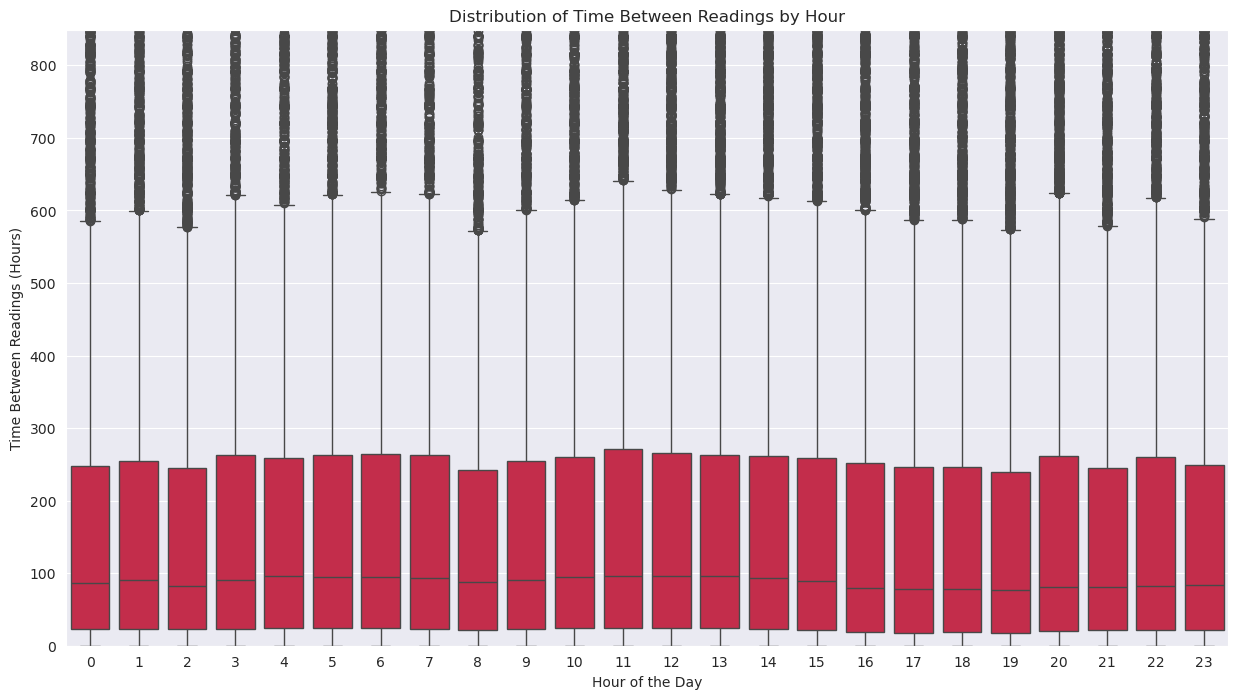

In [40]:
plot_time_diff_by_hour(df_copy)

As we can see, the time of day has almost no effect on the number of reads

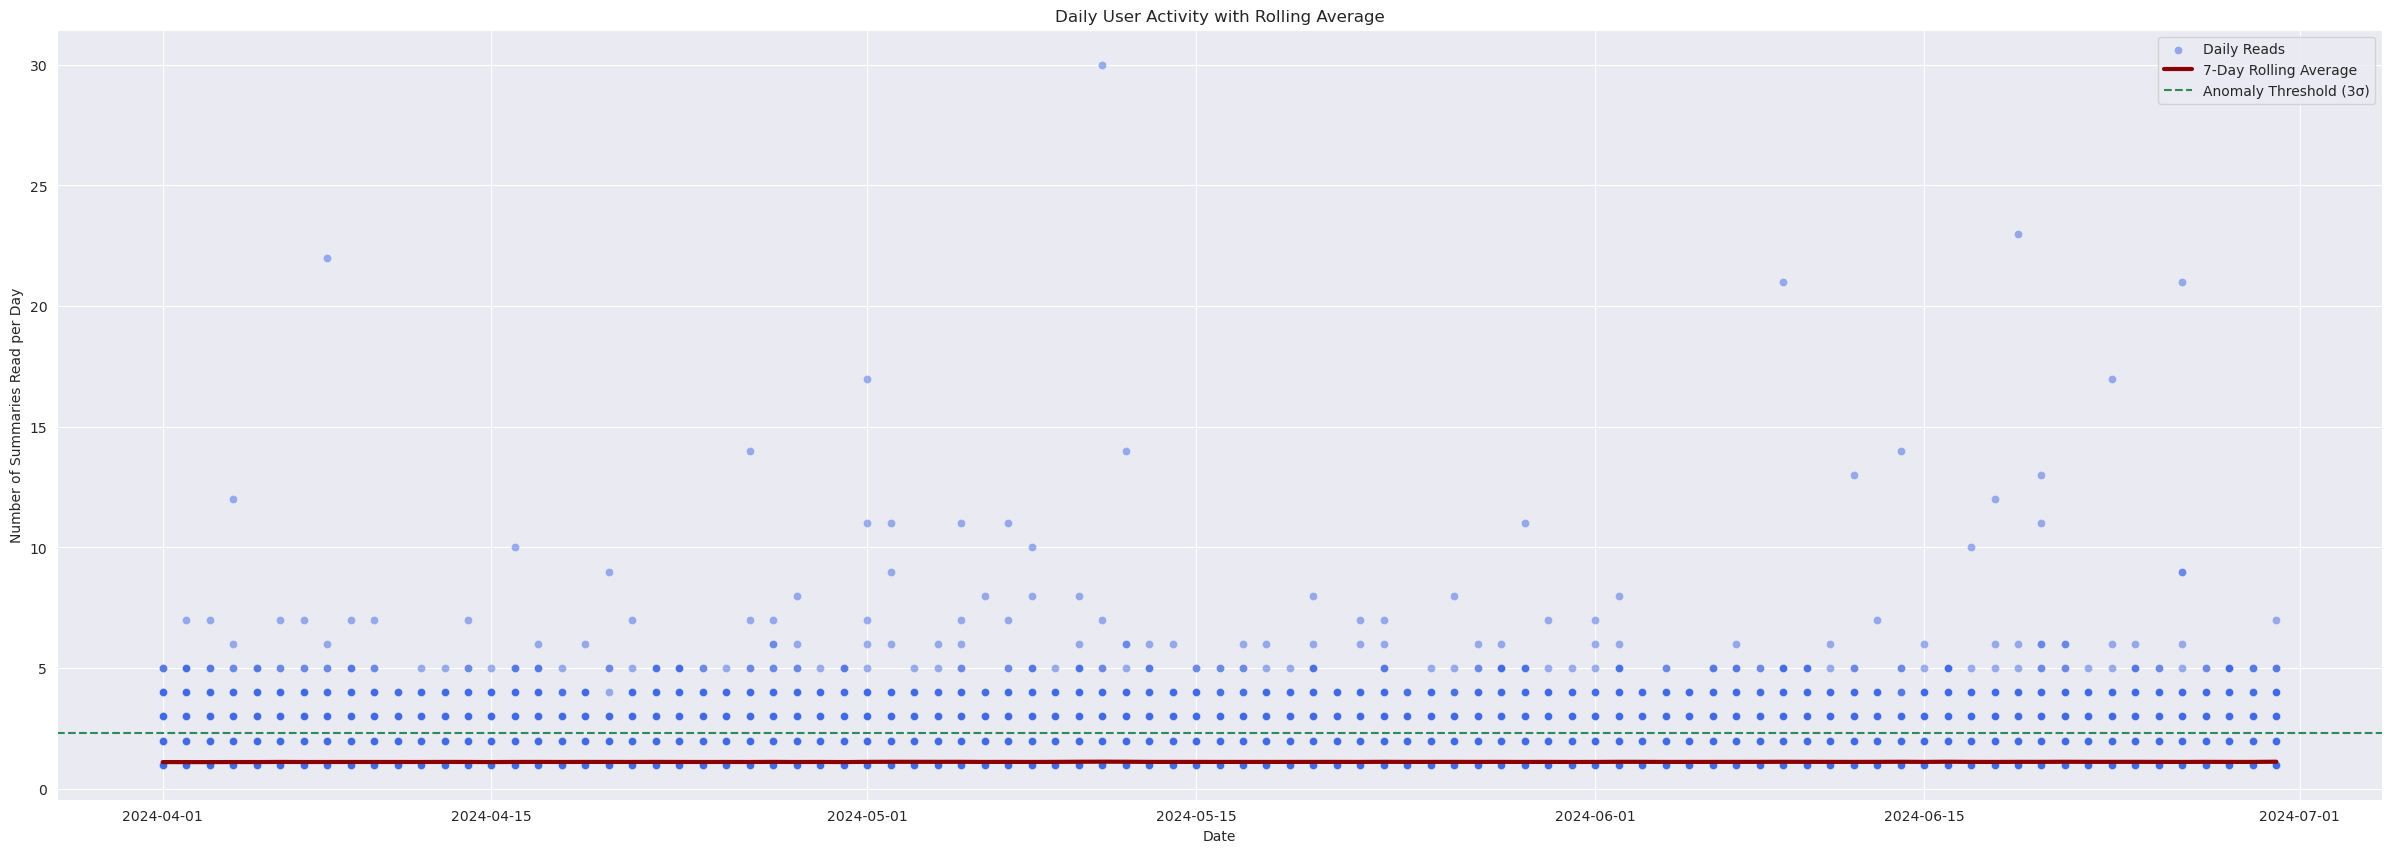

In [41]:
plot_user_activity(user_daily_reads)

Here we can see that the average value for a user is 2-3 books, and there are many users (about 5000) who go beyond this, and some of them even very much. But these 'anomalies' are quite natural and indicate that a small proportion of users are true 'connoisseurs' of the product. Such an audience can be called “loyal” and should be targeted for marketing campaigns, sweepstakes, etc.

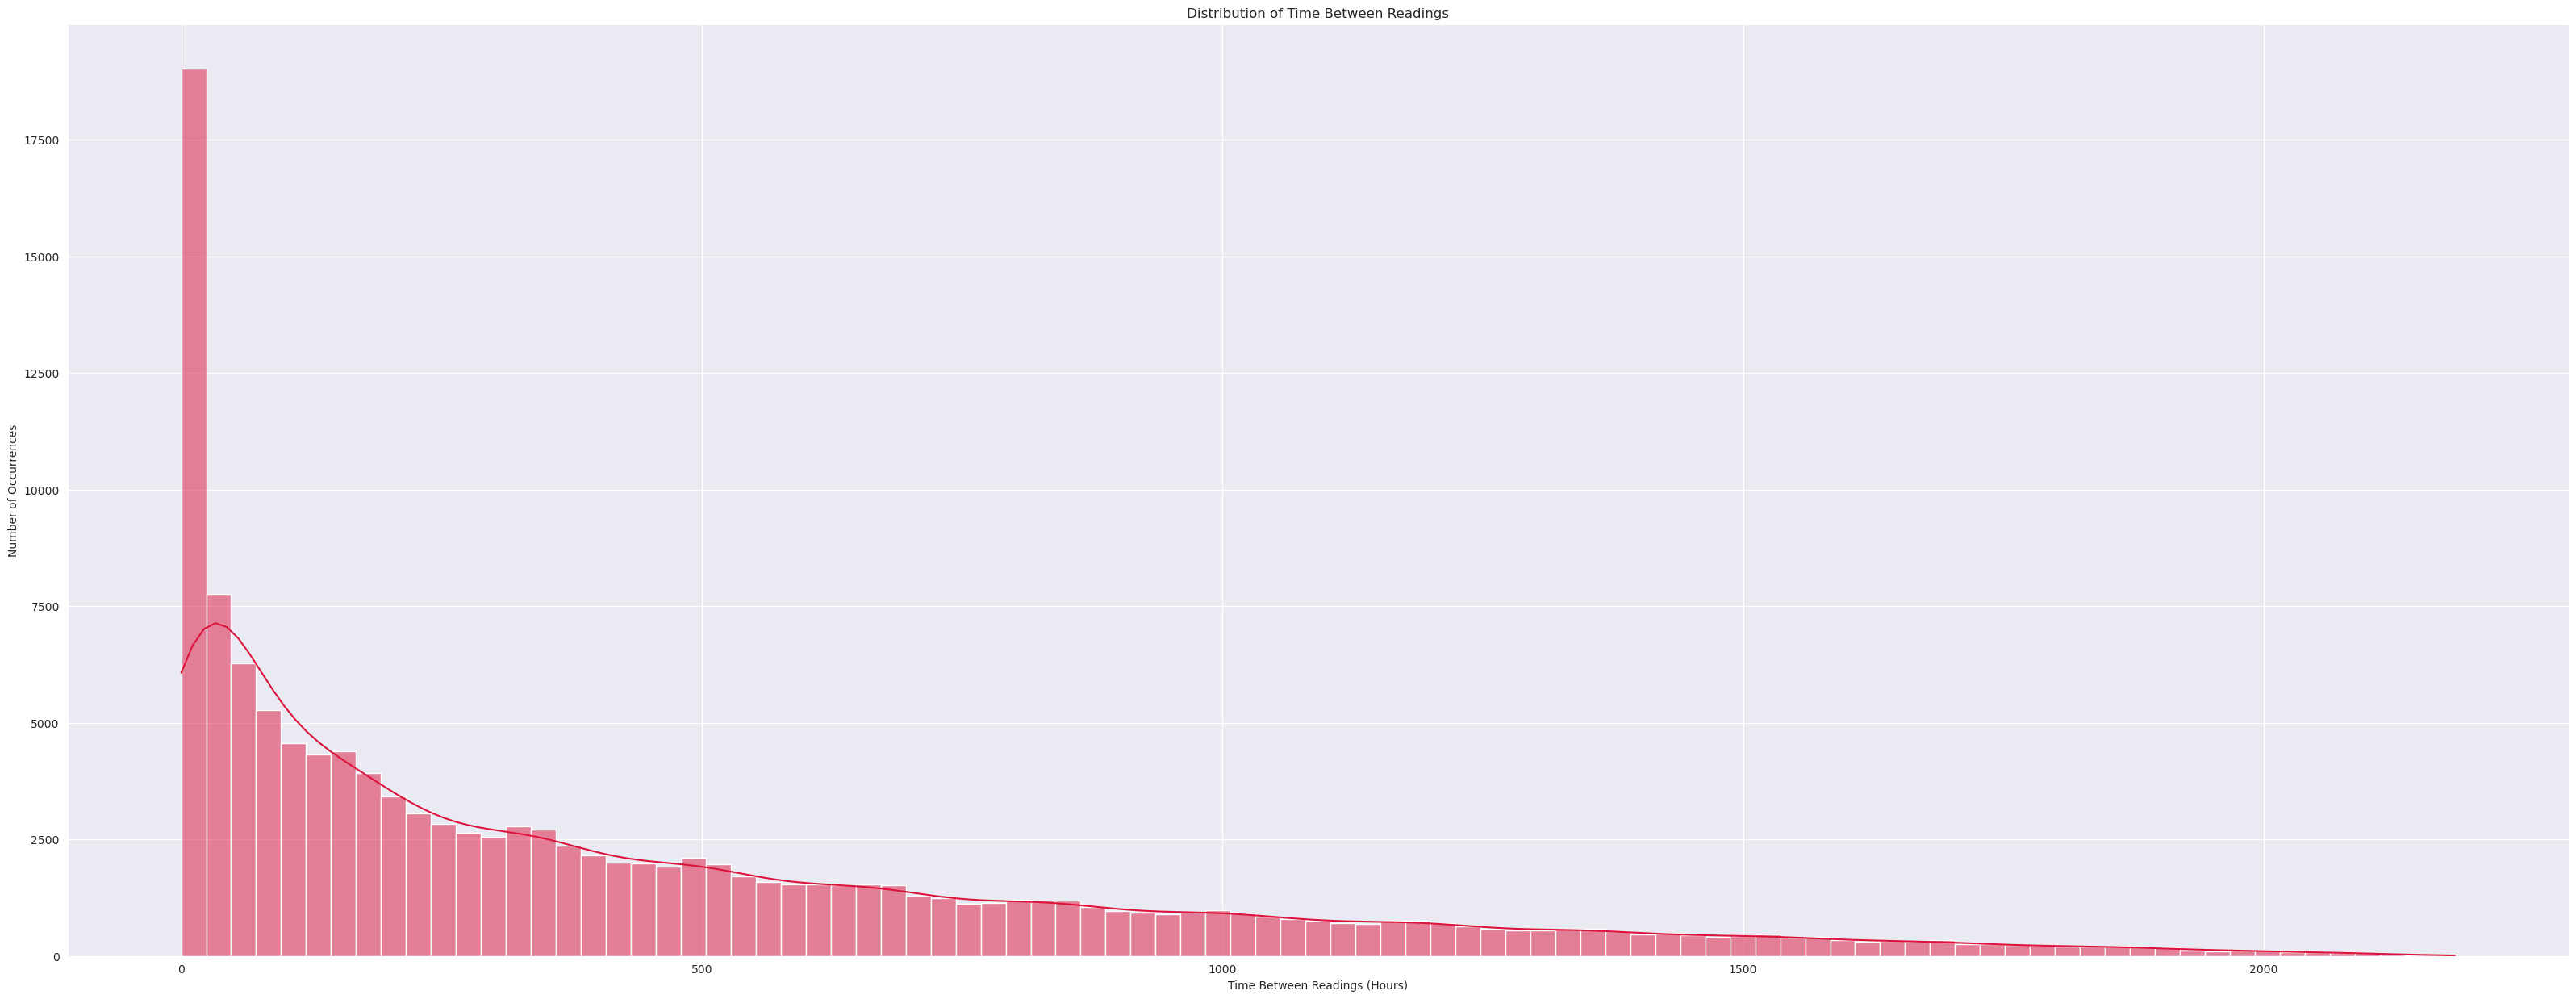

In [42]:
plot_time_diff_distribution(df_cleaned)

We can see the trend here: Most users read summaries in a short time, but there are many who do it in 500 hours or even more. This supports the hypothesis described above (that users make large intervals, so almost half of the entries have no beginning)

##### Others

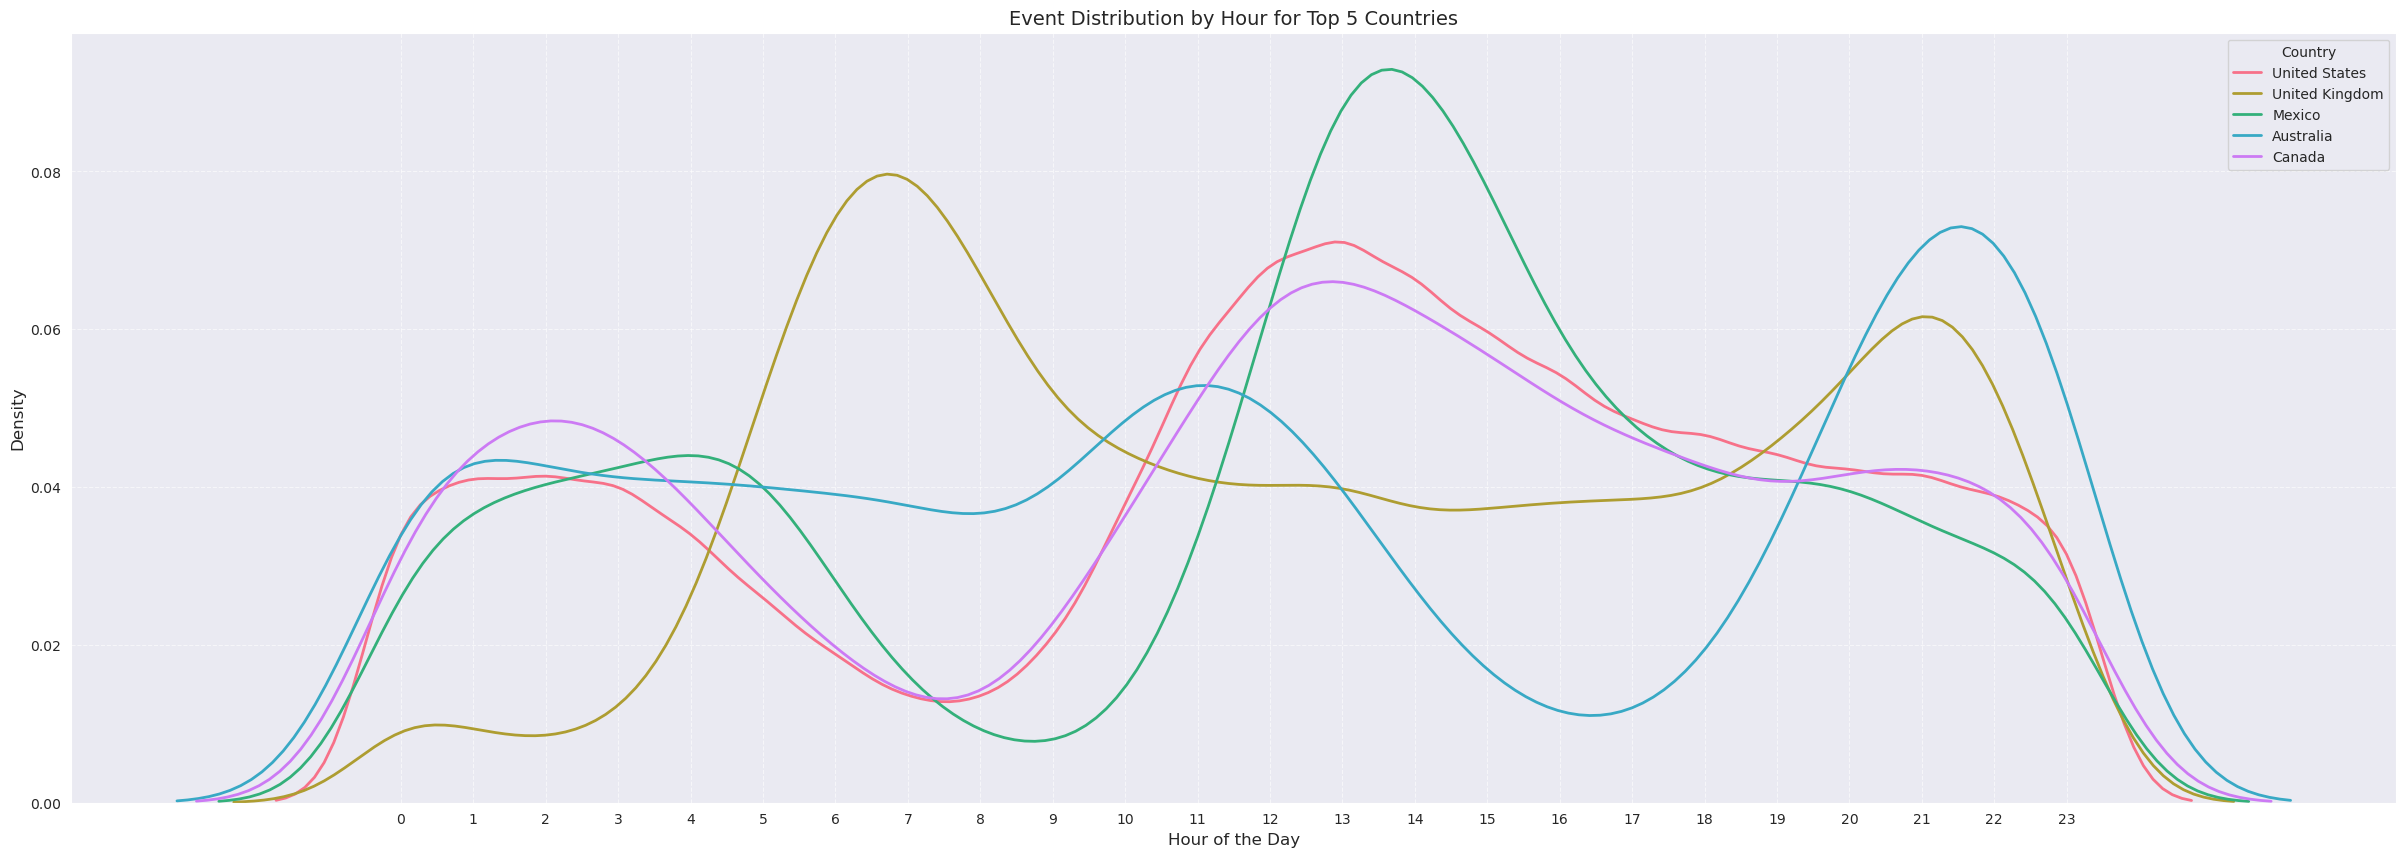

In [43]:
hour_activity_by_country(df_cleaned, 5)

As we can see, hourly peaks of activity differ from country to country. They are similar in countries with similar time zones (USA, Canada, Mexico), but they are radically different in others (UK). This indicates that the data is recorded at the local time of the user's country

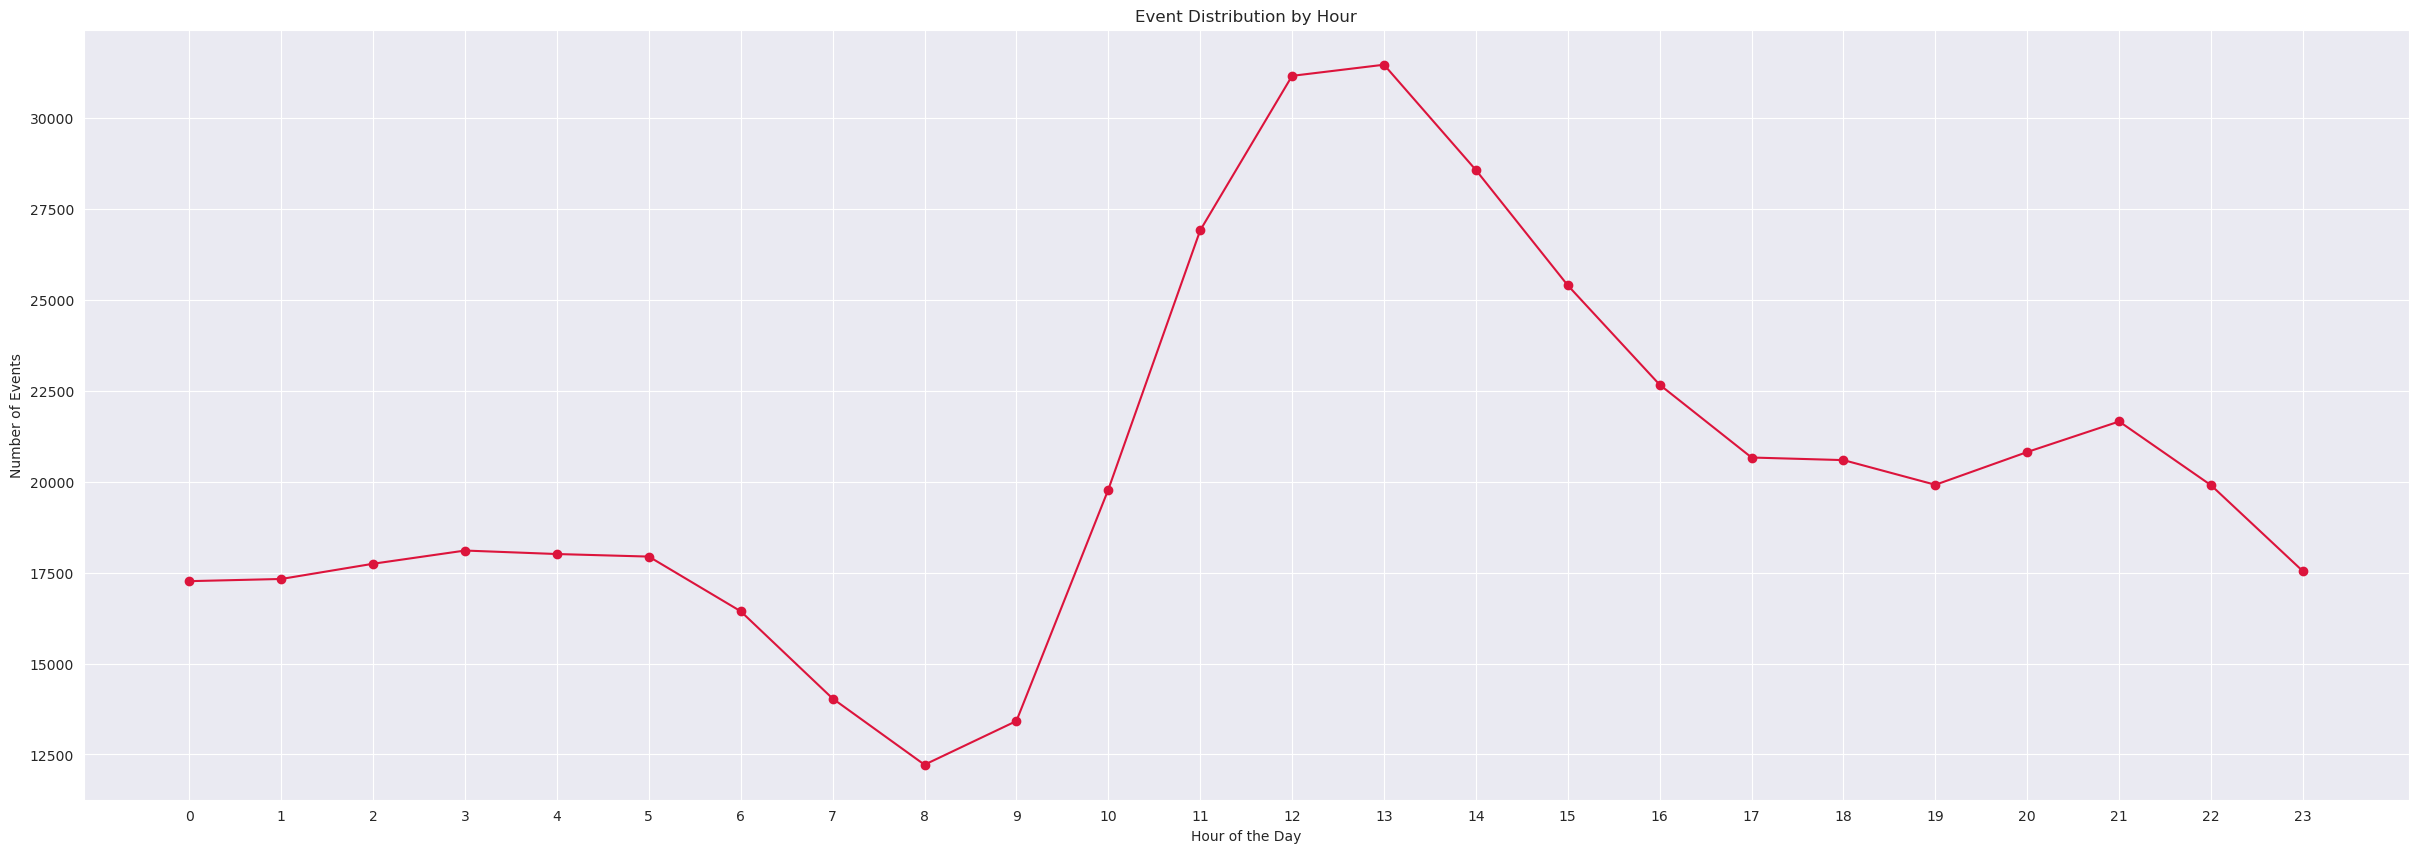

In [44]:
plot_event_distribution_by_hour(df_cleaned)

Here we see that most of them take place at lunchtime, which is quite expected. Also, the distribution is heavily skewed to this time period due to the dominant share of users from the United States, as time zones differ from country to country

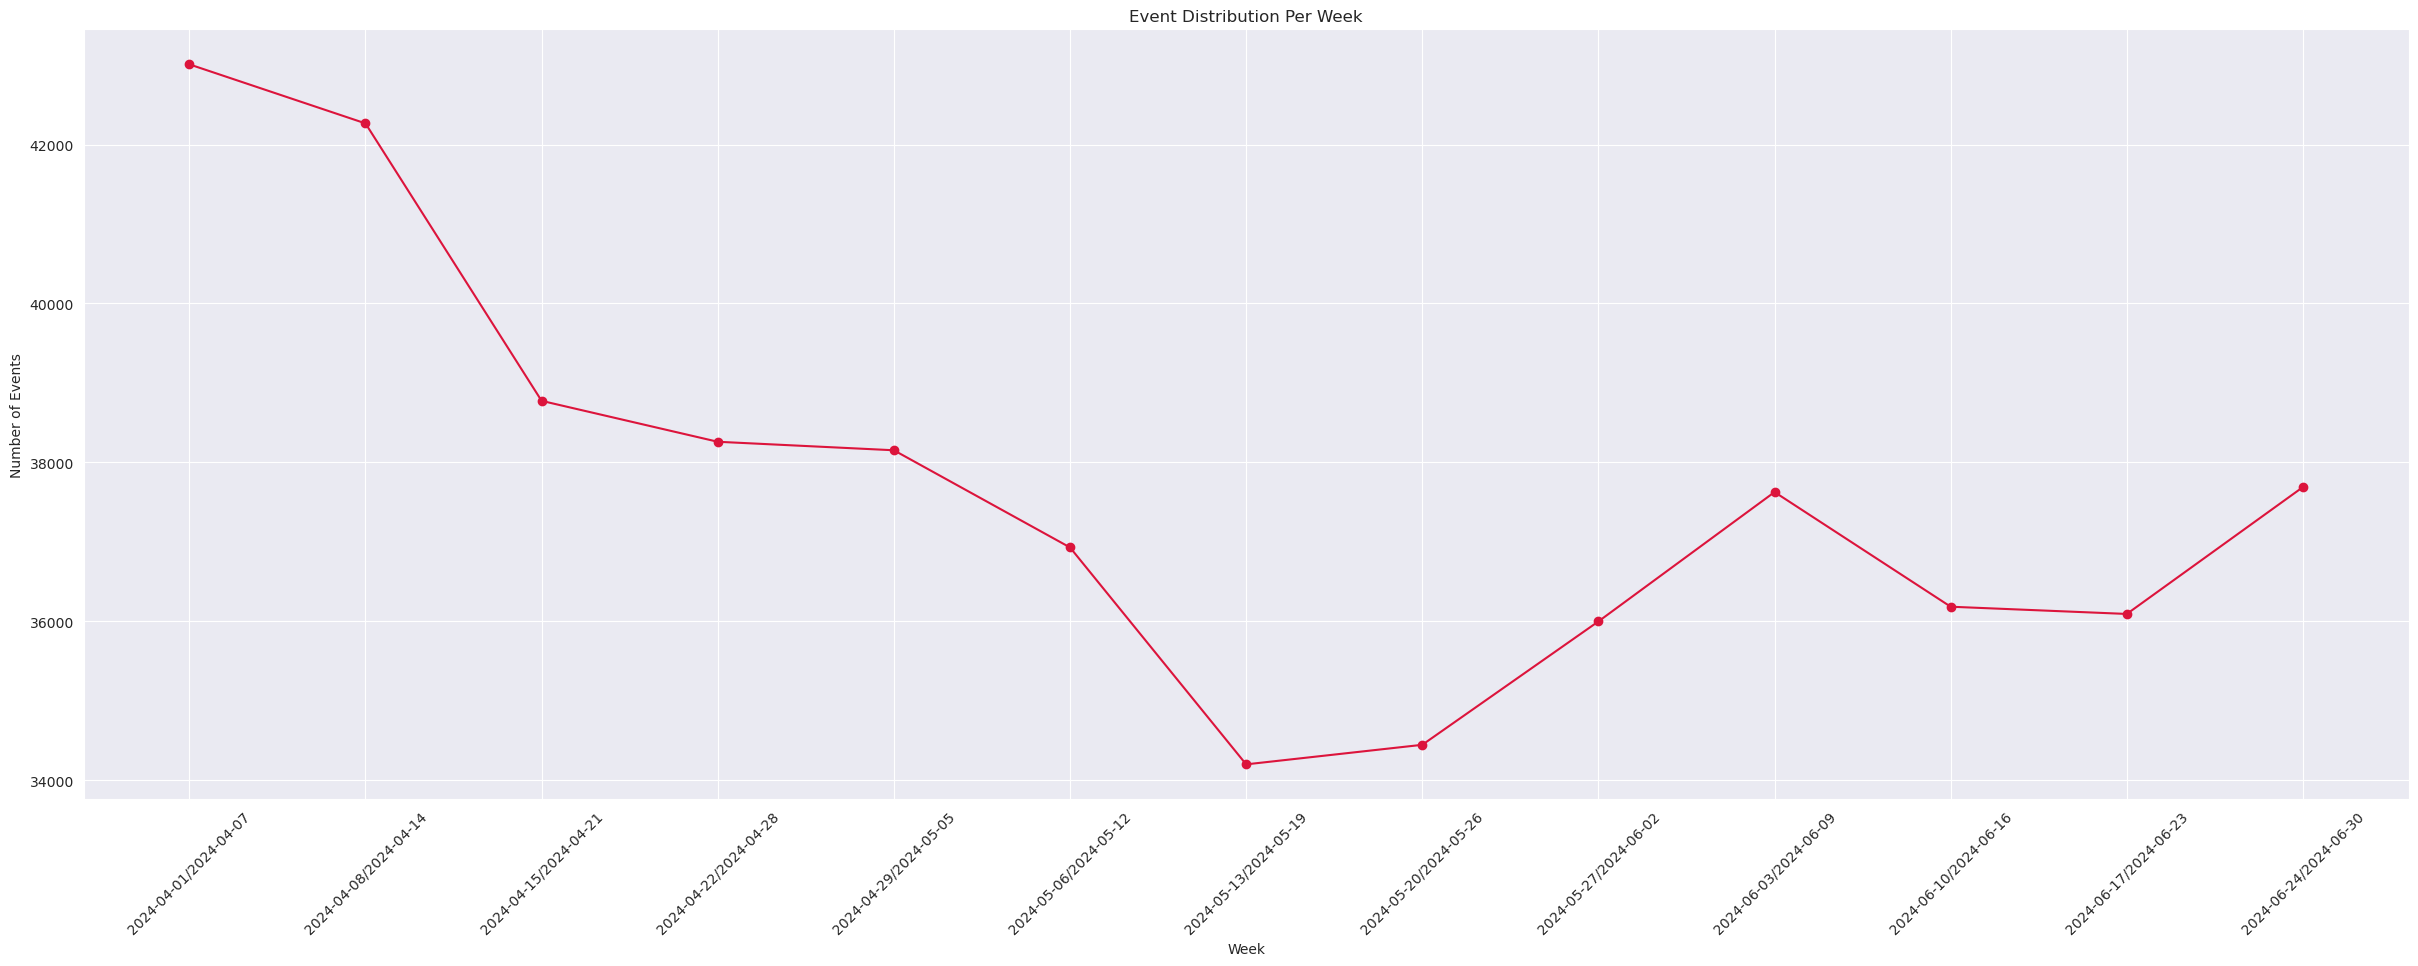

In [45]:
event_per_week(df_cleaned)

Here we see a fairly strong downward trend in activity, which occurs from April to mid-May, followed by a gradual recovery. It is worth taking a closer look at the period of minimum activity and comparing it with other, more successful periods to find out the reasons for this drop.

#### Changing age data

#### No changing age data

##### Distributions

###### Event Type and Fromat

###### Time differences between reading summary

In [46]:
df_copy = merged_df.copy()
df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
df_copy = df_copy.sort_values(by=["user_id", "event_time"])
df_copy["prev_event_time"] = df_copy.groupby("user_id")["event_time"].shift(1)
df_copy["time_diff"] = (df_copy["event_time"] - df_copy["prev_event_time"]).dt.total_seconds() / 3600

In [47]:
user_daily_reads = df_copy.groupby(["user_id", df_copy["event_time"].dt.date])["event_properties_book_id"].count().reset_index()
user_daily_reads.rename(columns={"event_properties_book_id": "daily_reads"}, inplace=True)

mean_reads = user_daily_reads["daily_reads"].mean()
std_reads = user_daily_reads["daily_reads"].std()
user_daily_reads["z_score"] = (user_daily_reads["daily_reads"] - mean_reads) / std_reads

In [48]:
outliers = user_daily_reads[user_daily_reads["daily_reads"] > 2]
outliers

,user_id,event_time,daily_reads,z_score
66,0030EYEB,2024-05-30,3,4.790614
70,004HJPZ9,2024-04-21,3,4.790614
100,008U1RZF,2024-04-14,3,4.790614
102,008U1RZF,2024-04-17,3,4.790614
137,00COSKYE,2024-06-30,3,4.790614
...,...,...,...,...
438419,ZZK7NXES,2024-05-13,3,4.790614
438423,ZZKTTDHY,2024-06-06,3,4.790614
438499,ZZQJXIDZ,2024-04-23,3,4.790614
438533,ZZT7UGNB,2024-05-25,3,4.790614


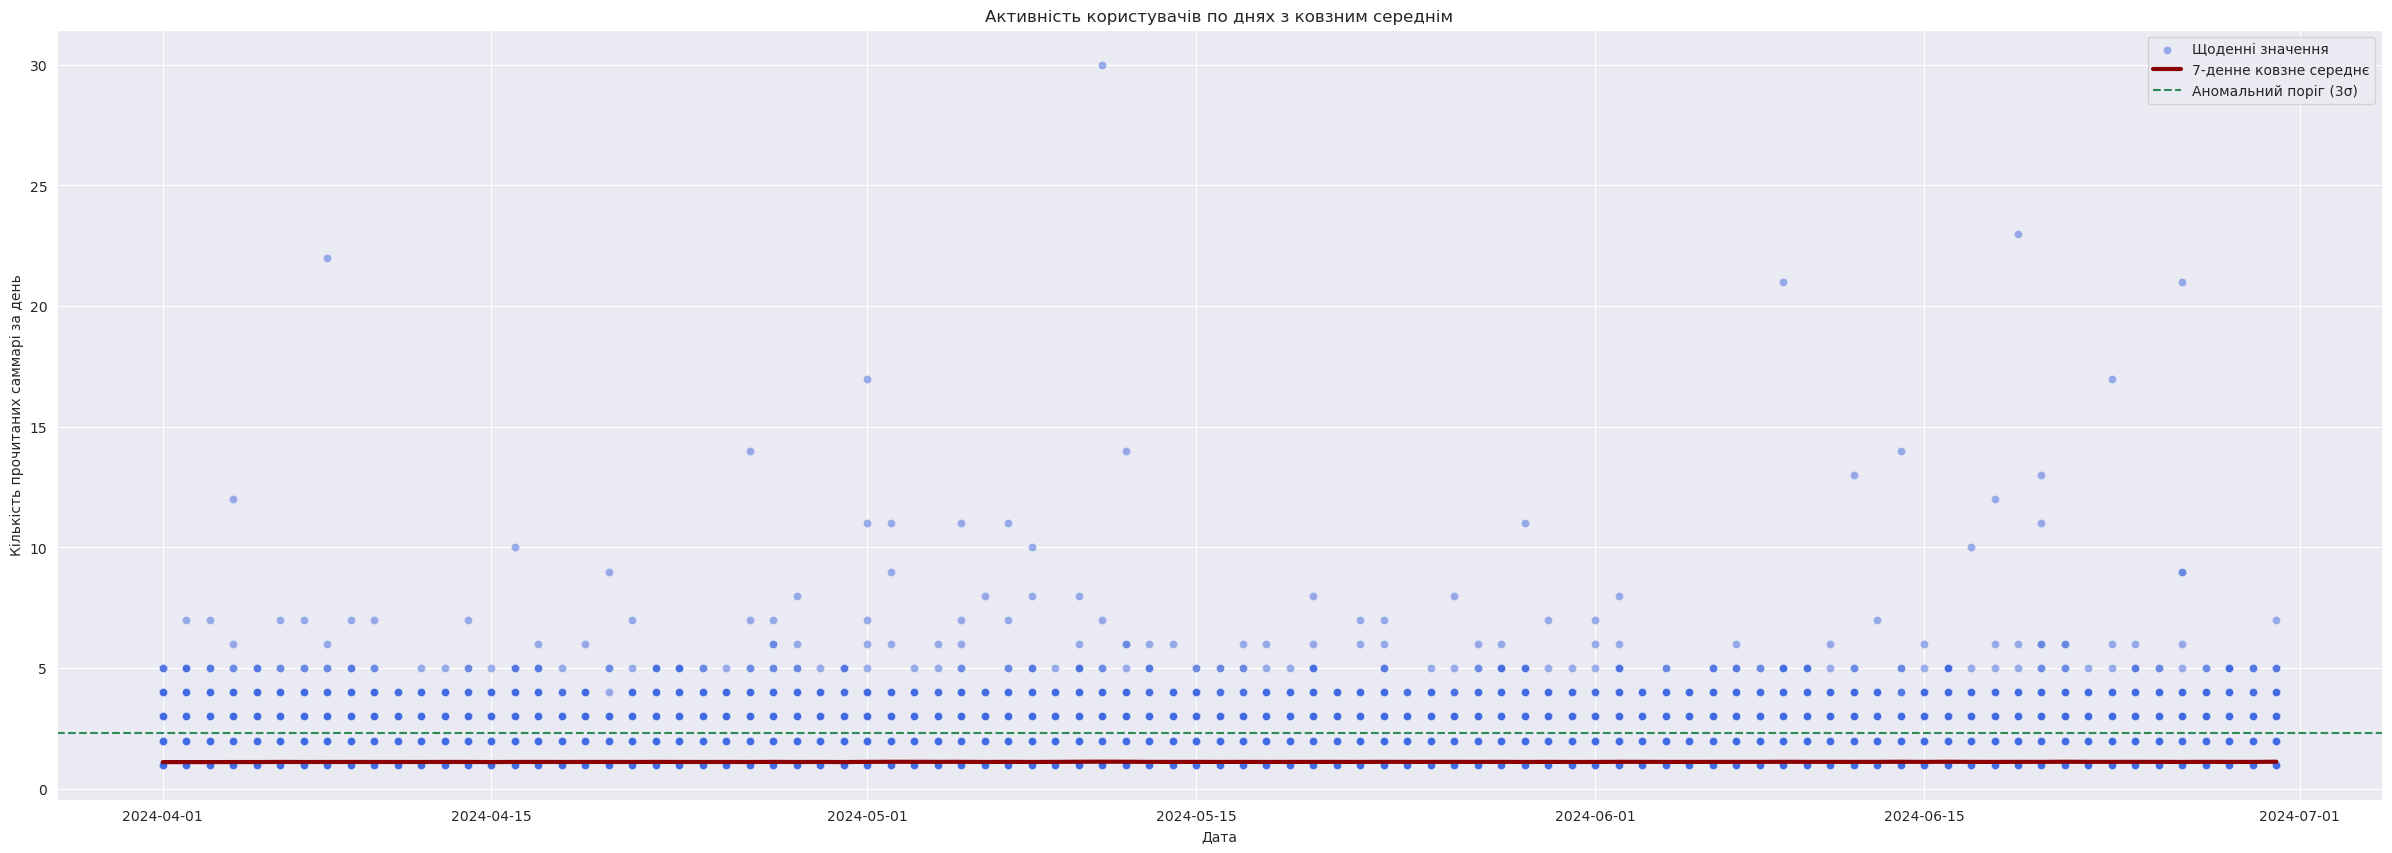

In [49]:
user_daily_reads["rolling_avg"] = user_daily_reads["daily_reads"].rolling(window=7).mean()

plt.figure(figsize=(30, 10))
sns.scatterplot(x=user_daily_reads["event_time"], y=user_daily_reads["daily_reads"], alpha=0.5, color='royalblue', label="Щоденні значення")
sns.lineplot(x=user_daily_reads["event_time"], y=user_daily_reads["rolling_avg"], color="darkred", linewidth=3, label="7-денне ковзне середнє")

plt.axhline(mean_reads + 3 * std_reads, color="seagreen", linestyle="dashed", label="Аномальний поріг (3σ)")
plt.xlabel("Дата")
plt.ylabel("Кількість прочитаних саммарі за день")
plt.title("Активність користувачів по днях з ковзним середнім")
plt.legend()
plt.show()

#### Other

In [50]:
outliers = user_daily_reads[user_daily_reads["daily_reads"] > 2]
outliers_merged = outliers.merge(
    merged_df[['user_id', 'event_time', 'event_properties_book_id', 'event_properties_format',
               'user_properties_age', 'country', 'topic']],
    on=["user_id", "event_time"],
    how="left"
)

outliers

,user_id,event_time,daily_reads,z_score,rolling_avg
66,0030EYEB,2024-05-30,3,4.790614,1.428571
70,004HJPZ9,2024-04-21,3,4.790614,1.571429
100,008U1RZF,2024-04-14,3,4.790614,1.428571
102,008U1RZF,2024-04-17,3,4.790614,1.714286
137,00COSKYE,2024-06-30,3,4.790614,1.285714
...,...,...,...,...,...
438419,ZZK7NXES,2024-05-13,3,4.790614,1.428571
438423,ZZKTTDHY,2024-06-06,3,4.790614,1.571429
438499,ZZQJXIDZ,2024-04-23,3,4.790614,1.571429
438533,ZZT7UGNB,2024-05-25,3,4.790614,1.571429


In [51]:
user_daily_reads

,user_id,event_time,daily_reads,z_score,rolling_avg
0,0001M3PA,2024-04-09,1,-0.295736,NaN
1,00036L7K,2024-06-11,1,-0.295736,NaN
2,000EASFZ,2024-04-11,1,-0.295736,NaN
3,000EASFZ,2024-04-20,1,-0.295736,NaN
4,000EASFZ,2024-05-06,1,-0.295736,NaN
...,...,...,...,...,...
438611,ZZYY8S7C,2024-04-30,1,-0.295736,1.142857
438612,ZZZ06MW2,2024-06-05,1,-0.295736,1.000000
438613,ZZZ128XJ,2024-04-25,2,2.247439,1.142857
438614,ZZZ128XJ,2024-06-05,1,-0.295736,1.142857


In [52]:
# df[df['user_id'] == '000EASFZ']
df[df['user_id'] == 'TQLQQLV6']

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
54223,54223,TQLQQLV6,2024-06-26 20:46:49,United States,summary_last_page,d9c5984592174ac3a855,audio,39.0
86983,86983,TQLQQLV6,2024-06-26 20:46:41,United States,summary_last_page,d9c5984592174ac3a855,audio,46.0
169246,169246,TQLQQLV6,2024-06-26 20:46:43,United States,summary_last_page,d9c5984592174ac3a855,audio,30.0
208086,208086,TQLQQLV6,2024-06-26 20:46:45,United States,summary_last_page,d9c5984592174ac3a855,audio,49.0
267173,267173,TQLQQLV6,2024-06-26 20:48:00,United States,summary_start,7jlIJDFk4DmgTfJuyFLc,audio,63.0
390662,390662,TQLQQLV6,2024-06-26 20:46:48,United States,summary_last_page,d9c5984592174ac3a855,audio,37.0
442619,442619,TQLQQLV6,2024-06-26 20:46:46,United States,summary_last_page,d9c5984592174ac3a855,audio,20.0
470108,470108,TQLQQLV6,2024-06-26 20:46:50,United States,summary_last_page,d9c5984592174ac3a855,audio,49.0
519802,519802,TQLQQLV6,2024-06-26 20:46:42,United States,summary_last_page,d9c5984592174ac3a855,audio,22.0


In [53]:
users_without_age_changes = df_copy[~df_copy["user_id"].isin(users_with_changes_ids)]
users_without_age_changes[users_without_age_changes['user_id'] == 'O19DCQ97']


,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic,prev_event_time,time_diff
314180,335799,O19DCQ97,2024-06-14 10:15:36,Dominican Republic,summary_last_page,8d9512d39b14461a9d47,text,46.0,Unknown,NaT,NaN
431406,461009,O19DCQ97,2024-06-18 15:26:24,Dominican Republic,summary_start,9114326ab1e54a3fabfe,audio,46.0,Negotiation Skills,2024-06-14 10:15:36,101.18


In [54]:
# age_distribution(users_without_age_changes)
# age_distribution(users_without_age_changes, unique=True)
users_without_age_changes.user_id.value_counts()

user_id
KRTTZYAZ    3
XOLTP31D    3
V1WA8HBI    3
VKDDGTUT    3
TCSW3NGX    3
           ..
C2TQDPOP    1
C2SZ1PU5    1
C2SFEKQE    1
C2RG1IVG    1
C2YJY4QB    1
Name: count, Length: 128071, dtype: int64

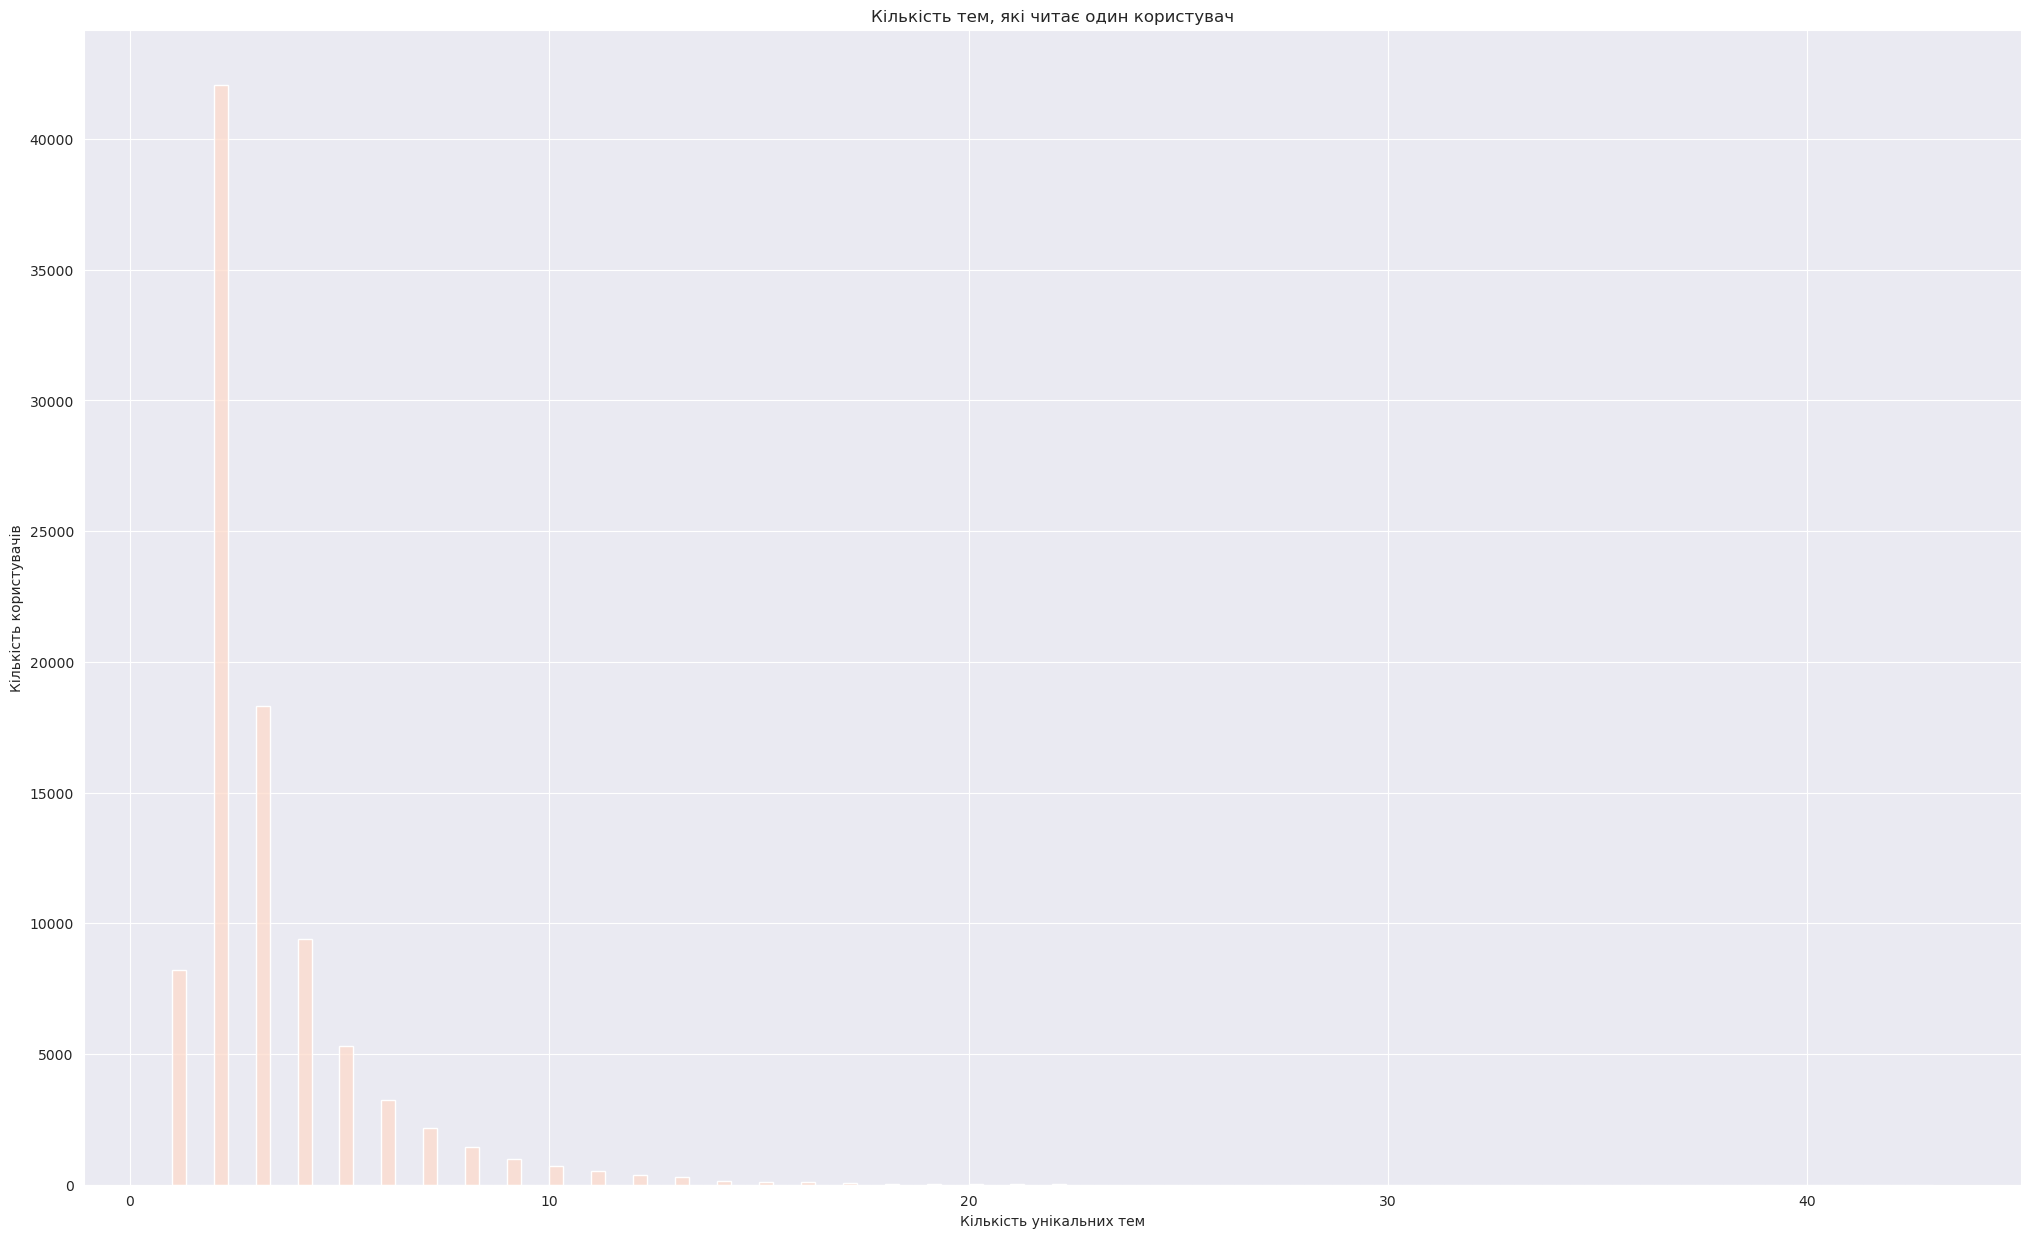

In [55]:
# Кількість унікальних тем, які прочитав кожен користувач
user_topic_counts = users_with_age_changes.groupby("user_id")["topic"].nunique()

plt.figure(figsize=(25, 15))
sns.histplot(user_topic_counts, bins=126)
plt.title("Кількість тем, які читає один користувач")
plt.xlabel("Кількість унікальних тем")
plt.ylabel("Кількість користувачів")
plt.show()



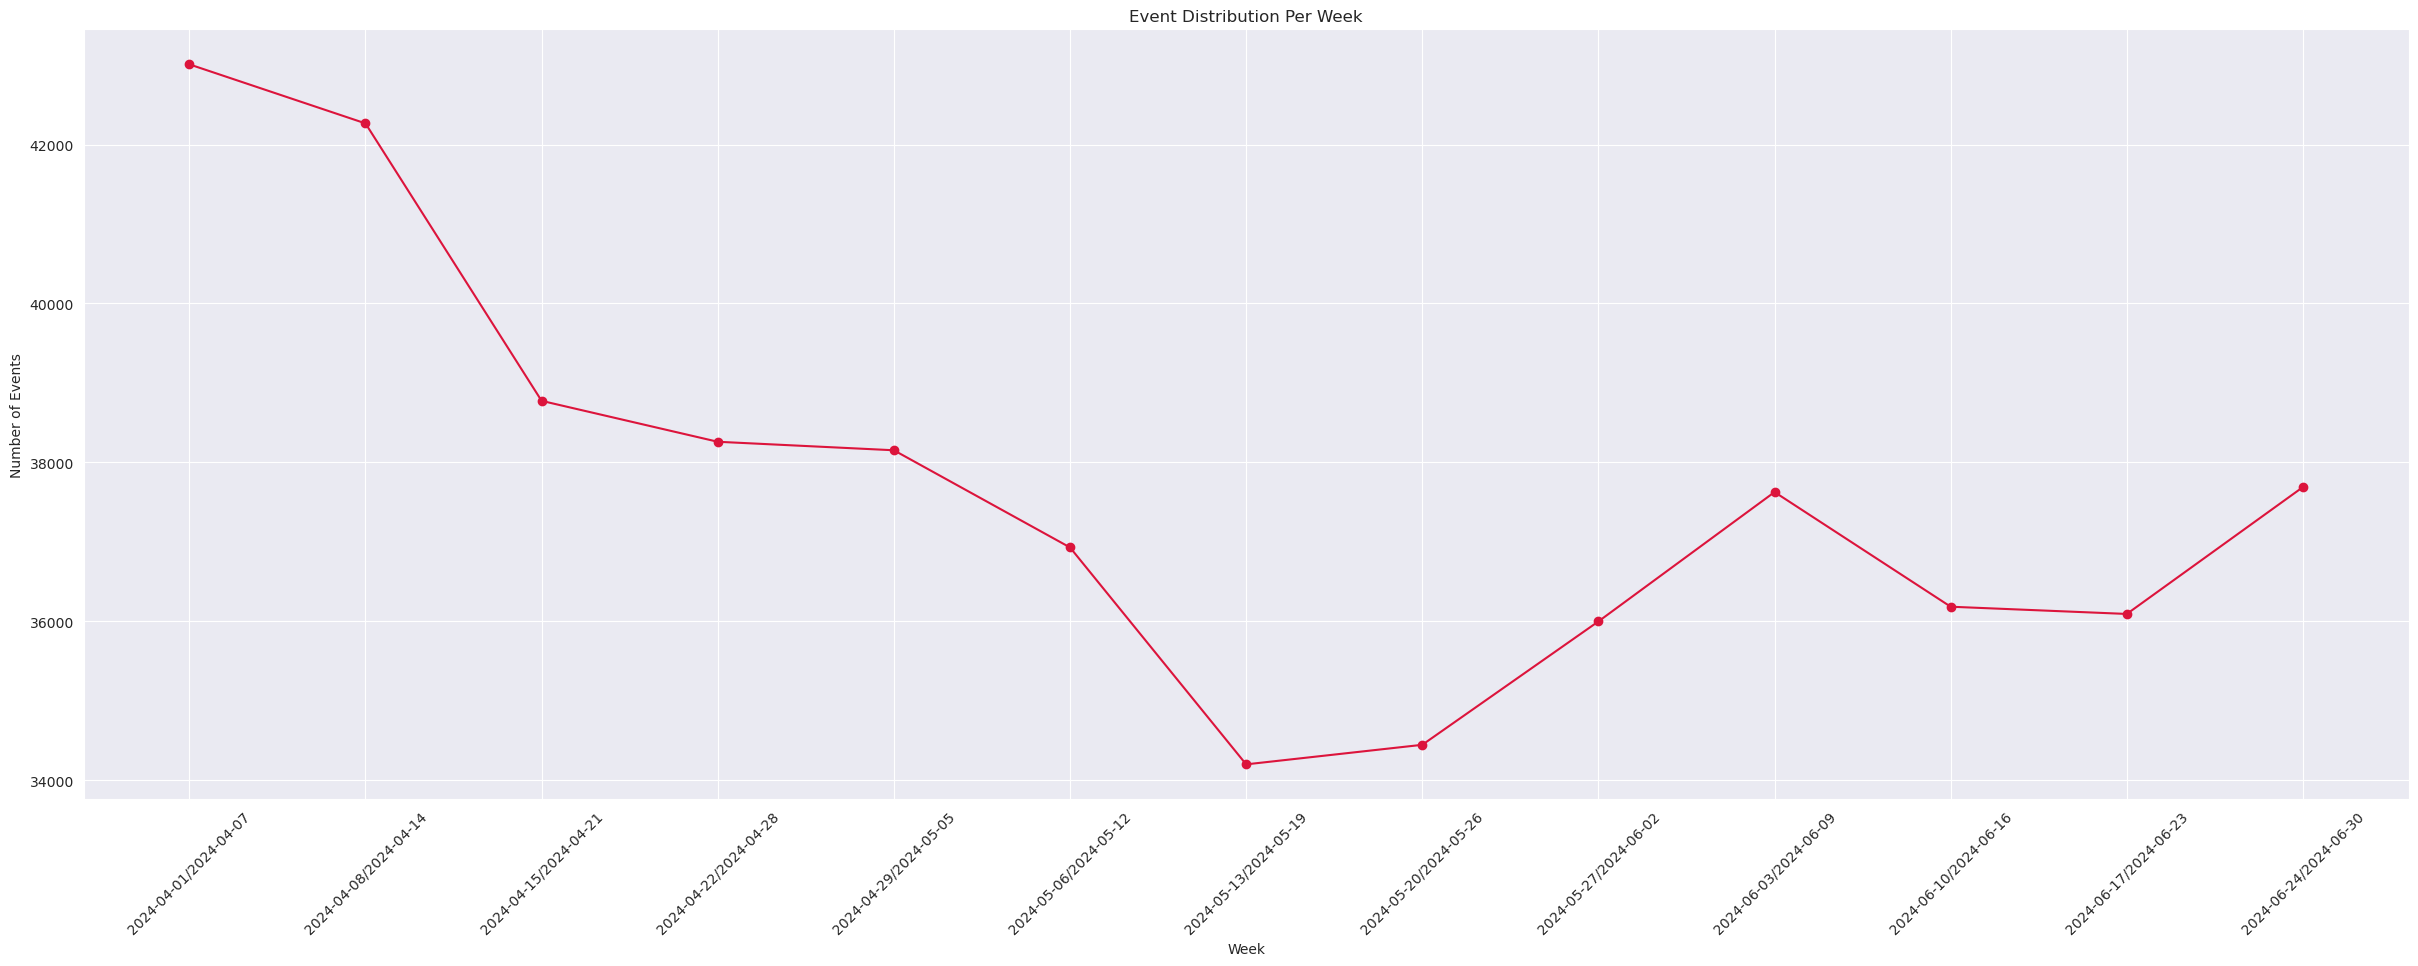

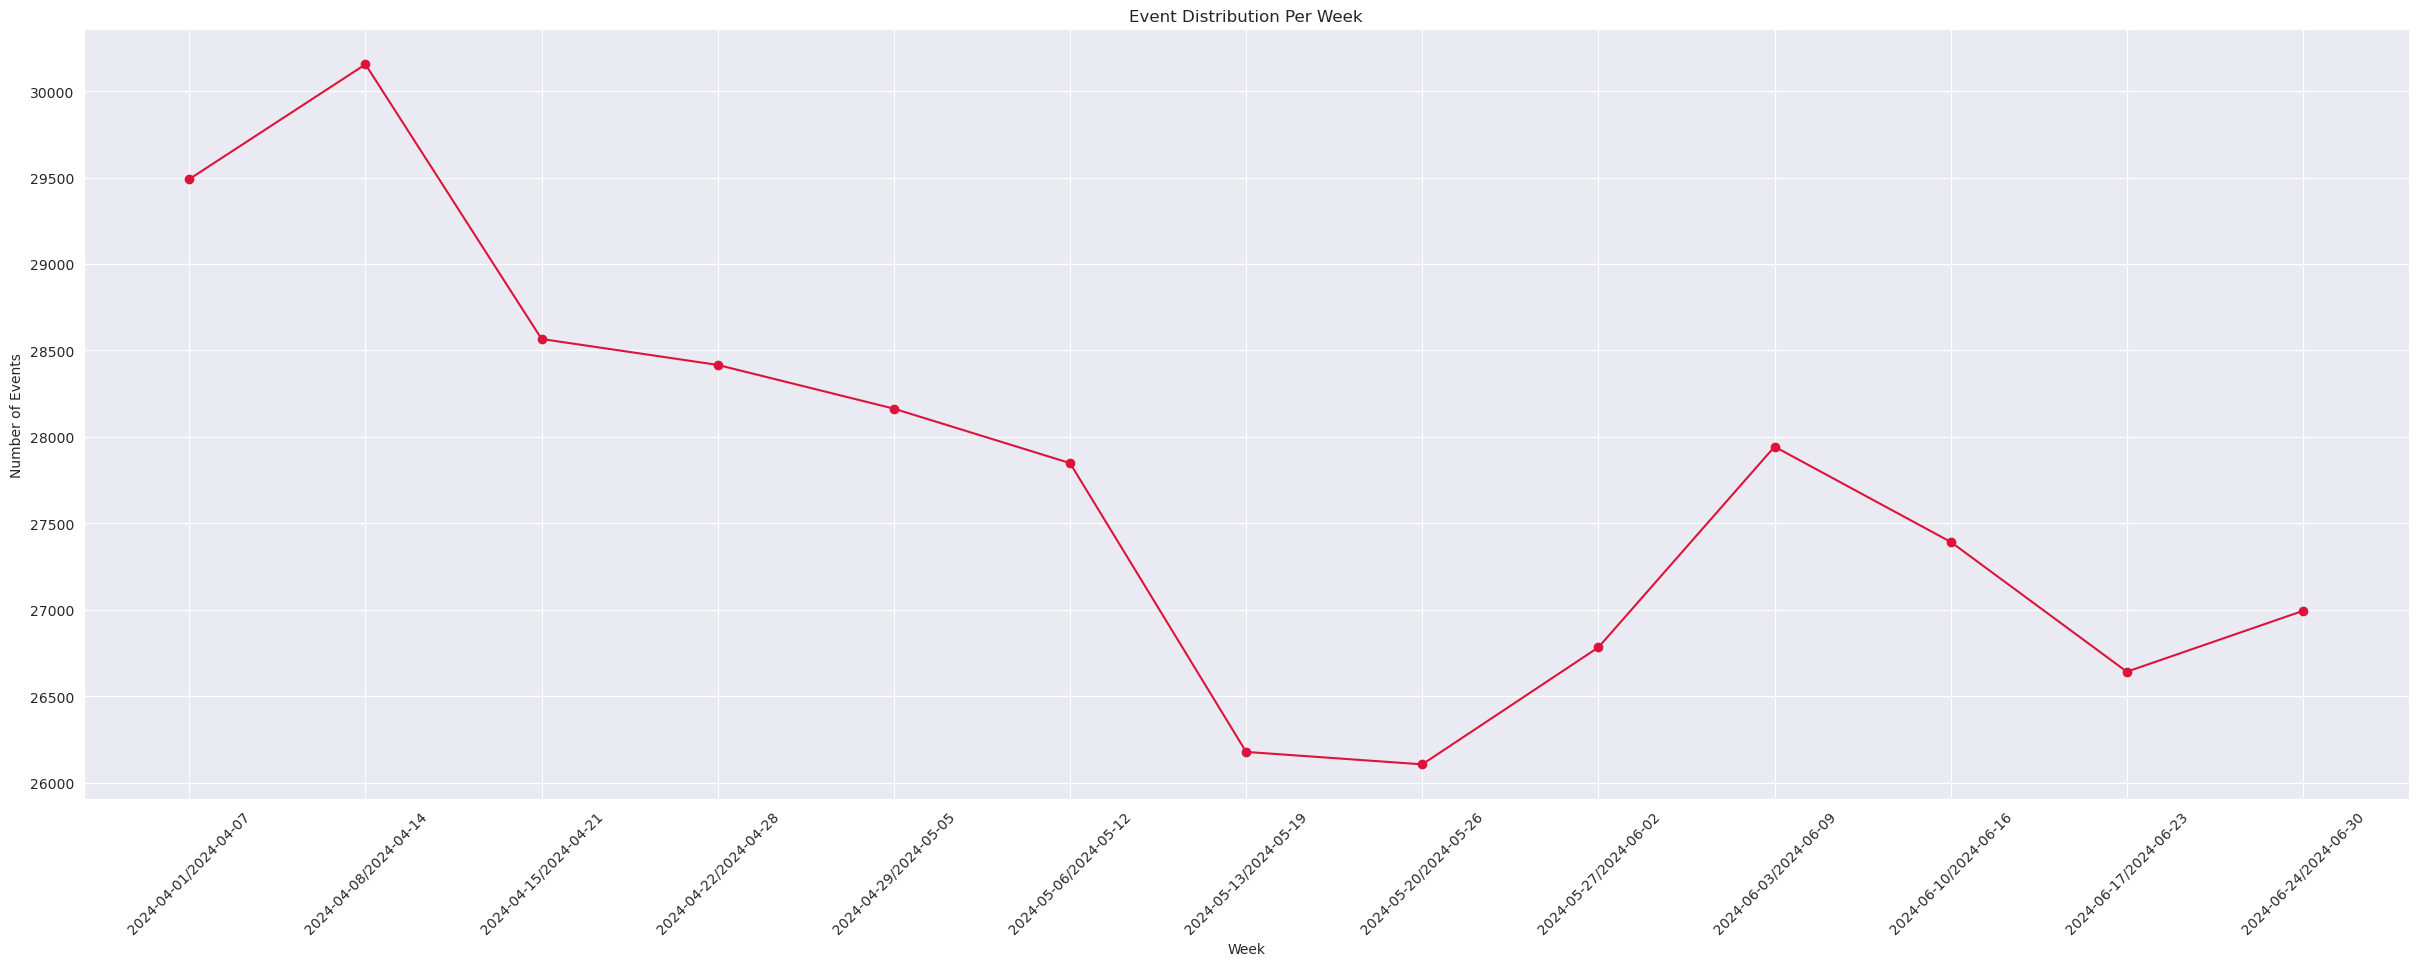

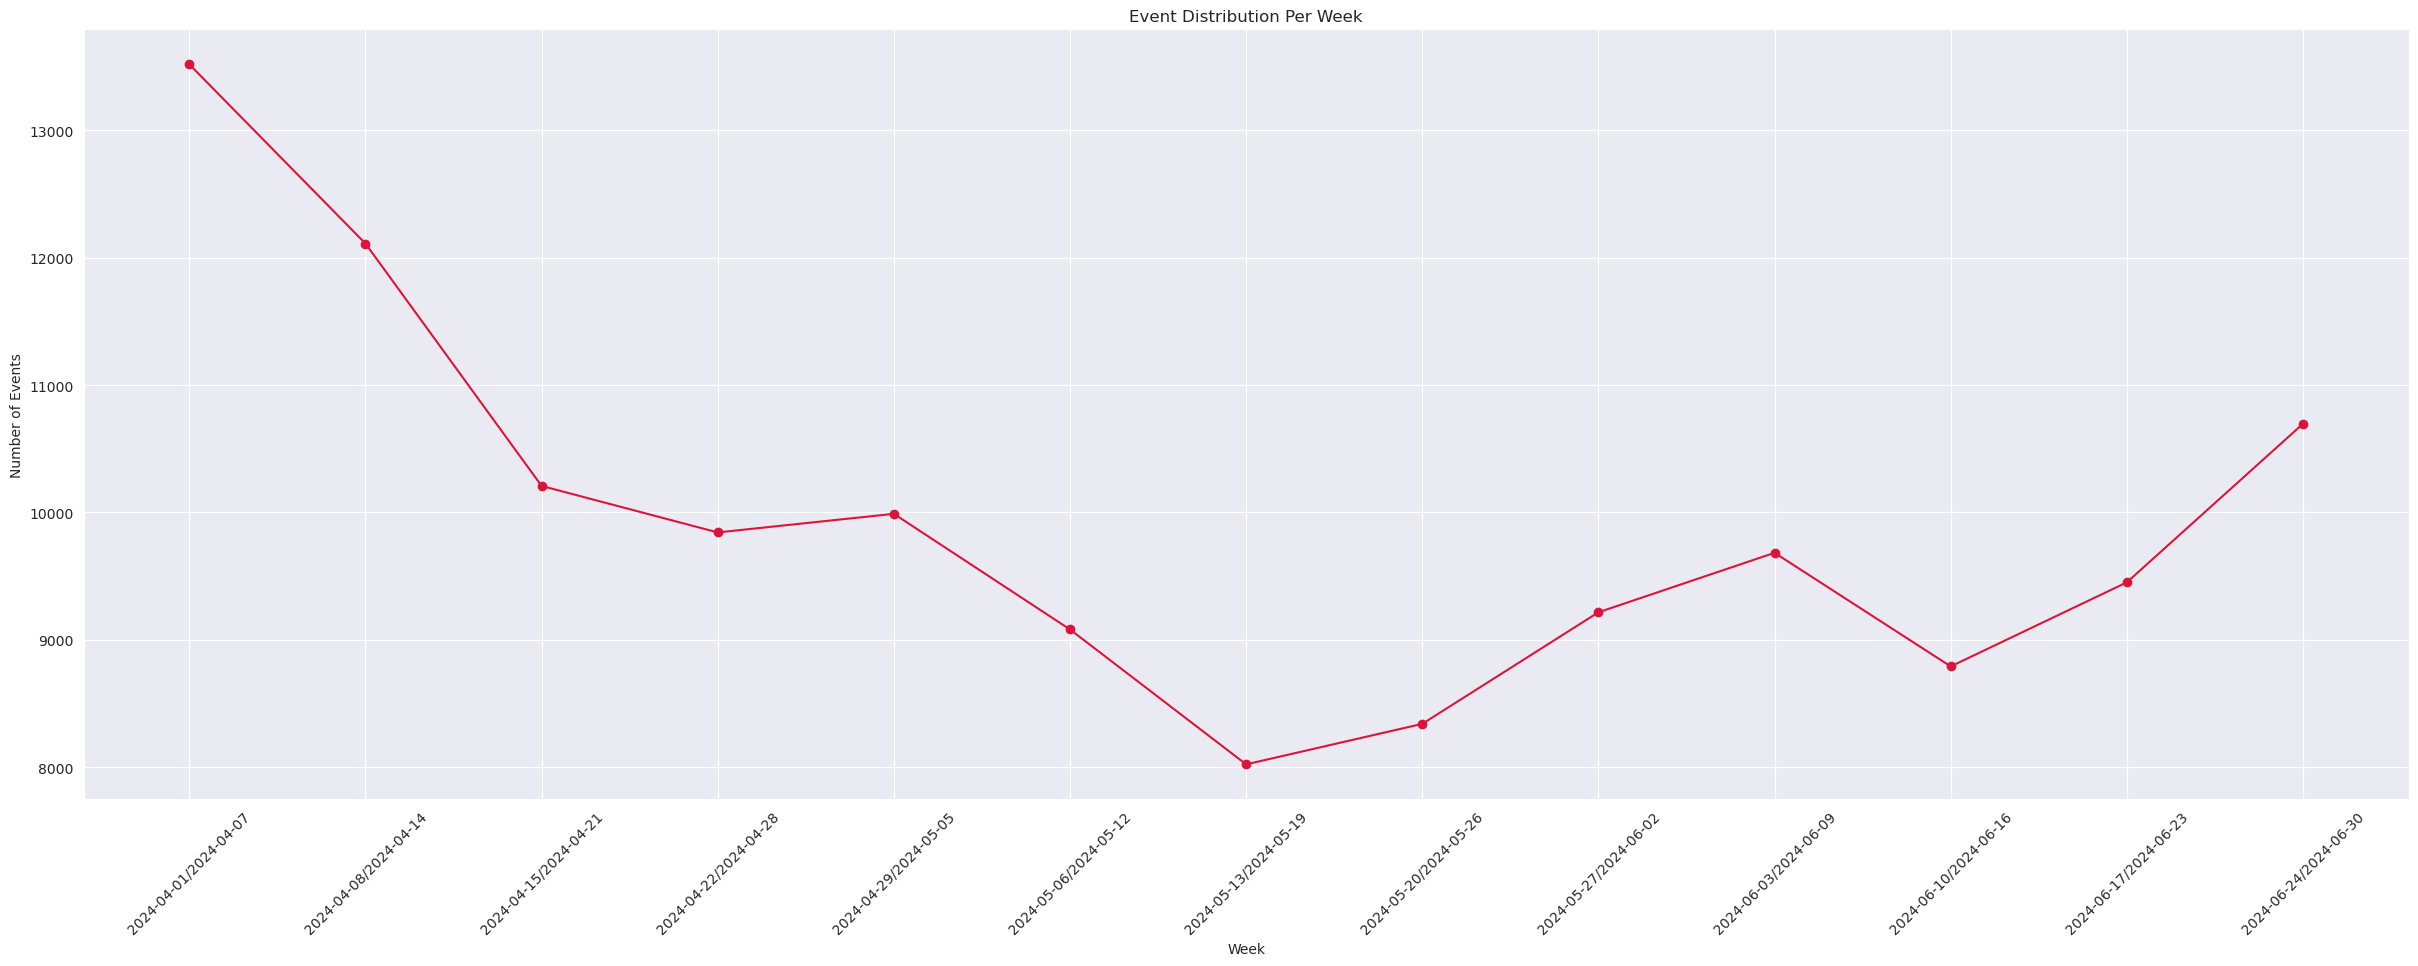

In [56]:
event_per_week(df_cleaned)
event_per_week(users_with_age_changes)
event_per_week(users_without_age_changes)